In [1]:
import scanpy as sc
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
import seaborn as sb

import os

# Define the path to the directory you want to change to
new_directory = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/NEW_OL_DEG/FINAL_sep/'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

In [2]:
save_dir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/NEW_OL_DEG/FINAL_sep/'

# Set up DEG lists

In [3]:
OPC_demyel = pd.read_csv('./files/LPC_demyel_OPCs_voom_wqw_REDO.csv', index_col=None)
OPC_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
OPC_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
OPC_demyel.shape

(8073, 7)

In [4]:
LPC_demyel_F = pd.read_csv('./files/LPC_demyel_MOL_DvF_voom_wqw_NEW.csv', index_col=None)
LPC_demyel_F.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_F.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_F.shape

(9677, 7)

In [5]:
LPC_demyel_E = pd.read_csv('./files/LPC_demyel_MOL_BvE_voom_wqw_REDO.csv', index_col=None)
LPC_demyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_E.shape

(9058, 7)

In [6]:
LPC_remyel_E = pd.read_csv('./files/LPC_remyel_MOL_BvE_voom_wqw.csv', index_col=None)
LPC_remyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_remyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_remyel_E.shape

(11337, 7)

In [7]:
Cupr_demyel_G = pd.read_csv('./files/Cupr_demyel_MOL_AvG_voom_wqw_NEW.csv', index_col=None)
Cupr_demyel_G.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_demyel_G.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_demyel_G.shape

(5144, 7)

In [8]:
Cupr_remyel_E = pd.read_csv('./files/Cupr_remyel_MOL_BvE_voom_wqw.csv', index_col=None)
Cupr_remyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_remyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_remyel_E.shape

(9013, 7)

In [9]:
# Filter for upregulated genes
OPC_de_up = OPC_demyel[(OPC_demyel.Padj < 0.05) & (OPC_demyel.logFC >= 1)]
print(OPC_de_up.shape)

# Filter for downregulated genes
OPC_de_down = OPC_demyel[(OPC_demyel.Padj < 0.05) & (OPC_demyel.logFC <= -1)]
print(OPC_de_down.shape)

(199, 7)
(302, 7)


In [10]:
# Filter for upregulated genes
LPC_de_F_up = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC >= 1)]
print(LPC_de_F_up.shape)

# Filter for downregulated genes
LPC_de_F_down = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC <= -1)]
print(LPC_de_F_down.shape)

(271, 7)
(232, 7)


In [11]:
# Filter for upregulated genes
LPC_de_E_up = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC >= 1)]
print(LPC_de_E_up.shape)

# Filter for downregulated genes
LPC_de_E_down = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC <= -1)]
print(LPC_de_E_down.shape)

(334, 7)
(232, 7)


In [12]:
# Filter for upregulated genes
LPC_re_E_up = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC >= 1)]
print(LPC_re_E_up.shape)

# Filter for downregulated genes
LPC_re_E_down = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC <= -1)]
print(LPC_re_E_down.shape)

(624, 7)
(318, 7)


In [13]:
# Filter for upregulated genes
Cupr_de_G_up = Cupr_demyel_G[(Cupr_demyel_G.Padj < 0.05) & (Cupr_demyel_G.logFC >= 1)]
print(Cupr_de_G_up.shape)

# Filter for downregulated genes
Cupr_de_G_down = Cupr_demyel_G[(Cupr_demyel_G.Padj < 0.05) & (Cupr_demyel_G.logFC <= -1)]
print(Cupr_de_G_down.shape)

(462, 7)
(554, 7)


In [14]:
# Filter for upregulated genes
Cupr_re_E_up = Cupr_remyel_E[(Cupr_remyel_E.Padj < 0.05) & (Cupr_remyel_E.logFC >= 1)]
print(Cupr_re_E_up.shape)

# Filter for downregulated genes
Cupr_re_E_down = Cupr_remyel_E[(Cupr_remyel_E.Padj < 0.05) & (Cupr_remyel_E.logFC <= -1)]
print(Cupr_re_E_down.shape)

(22, 7)
(2, 7)


## Lower cutoff to 1.5 logFC

In [15]:
# Filter for upregulated genes
OPC_de_up = OPC_demyel[(OPC_demyel.Padj < 0.05) & (OPC_demyel.logFC >= 0.585)]
print(OPC_de_up.shape)

# Filter for downregulated genes
OPC_de_down = OPC_demyel[(OPC_demyel.Padj < 0.05) & (OPC_demyel.logFC <= -0.585)]
print(OPC_de_down.shape)

(553, 7)
(1012, 7)


In [16]:
# Filter for upregulated genes
LPC_de_F_up = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC >= 0.585)]
print(LPC_de_F_up.shape)

# Filter for downregulated genes
LPC_de_F_down = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC <= -0.585)]
print(LPC_de_F_down.shape)

(370, 7)
(479, 7)


In [17]:
# Filter for upregulated genes
LPC_de_E_up = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC >= 0.585)]
print(LPC_de_E_up.shape)

# Filter for downregulated genes
LPC_de_E_down = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC <= -0.585)]
print(LPC_de_E_down.shape)

(528, 7)
(556, 7)


In [18]:
# Filter for upregulated genes
LPC_re_E_up = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC >= 0.585)]
print(LPC_re_E_up.shape)

# Filter for downregulated genes
LPC_re_E_down = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC <= -0.585)]
print(LPC_re_E_down.shape)

(887, 7)
(769, 7)


In [19]:
# Filter for upregulated genes
Cupr_de_G_up = Cupr_demyel_G[(Cupr_demyel_G.Padj < 0.05) & (Cupr_demyel_G.logFC >= 0.585)]
print(Cupr_de_G_up.shape)

# Filter for downregulated genes
Cupr_de_G_down = Cupr_demyel_G[(Cupr_demyel_G.Padj < 0.05) & (Cupr_demyel_G.logFC <= -0.585)]
print(Cupr_de_G_down.shape)

(616, 7)
(827, 7)


In [20]:
# Filter for upregulated genes
Cupr_re_E_up = Cupr_remyel_E[(Cupr_remyel_E.Padj < 0.05) & (Cupr_remyel_E.logFC >= 0.585)]
print(Cupr_re_E_up.shape)

# Filter for downregulated genes
Cupr_re_E_down = Cupr_remyel_E[(Cupr_remyel_E.Padj < 0.05) & (Cupr_remyel_E.logFC <= -0.585)]
print(Cupr_re_E_down.shape)

(23, 7)
(2, 7)


# Bar chart

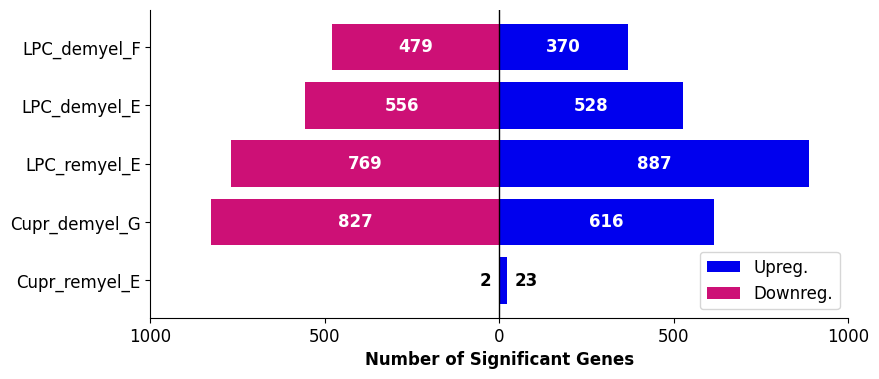

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data
conditions = ["LPC_demyel_F", "LPC_demyel_E", "LPC_remyel_E", "Cupr_demyel_G", "Cupr_remyel_E"]
up_genes = np.array([370, 528, 887, 616, 23])
down_genes = np.array([-479, -556, -769, -827, -2])  # Negative for left alignment

# Reverse all data
conditions = conditions[::-1]
up_genes = up_genes[::-1]
down_genes = down_genes[::-1]

# Bar width (increased) and figure size (shorter height)
bar_width = 0.8
fig, ax = plt.subplots(figsize=(9, 4))  # Reduce height to save space

# Plot downregulated genes (left side, using negative values)
bars_down = ax.barh(conditions, down_genes, color='#CD1076', label="Downregulated Genes", height=bar_width)

# Plot upregulated genes (right side, starting at 0)
bars_up = ax.barh(conditions, up_genes, color='#0000EE', label="Upregulated Genes", height=bar_width)

# Add number labels inside the bars, except for Cupr_remyel_E (last condition)
for bar, value, condition in zip(bars_down, down_genes, conditions):
    if condition == "Cupr_remyel_E":
        ax.text(bar.get_x() + bar.get_width() - 20,  # Just outside the bar
                bar.get_y() + bar.get_height() / 2, 
                str(abs(value)), 
                ha='right', va='center', color='black', fontsize=12, fontweight='bold')
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                str(abs(value)), 
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

for bar, value, condition in zip(bars_up, up_genes, conditions):
    if condition == "Cupr_remyel_E":
        ax.text(bar.get_x() + bar.get_width() + 20,  # Just outside the bar
                bar.get_y() + bar.get_height() / 2, 
                str(value), 
                ha='left', va='center', color='black', fontsize=12, fontweight='bold')
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + bar.get_height() / 2, 
                str(value), 
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Formatting
ax.set_yticks(np.arange(len(conditions)))
ax.set_yticklabels(conditions, fontsize=12)
ax.set_xlabel("Number of Significant Genes", fontsize=12, fontweight='bold')

# Adjust x-axis to show only 500 and 1000
ax.set_xticks([-1000, -500, 0, 500, 1000])
ax.set_xticklabels([1000, 500, 0, 500, 1000], fontsize=12)

ax.axvline(0, color='black', linewidth=1)  # Zero line

# Remove right and top spines for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Properly reorder the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], ["Upreg.", "Downreg."], loc="lower right", fontsize=12)

# Save the plot
plt.savefig("DEG_bar_chart.png", dpi=300, bbox_inches='tight')  # Save with high quality

# Show plot
plt.show()


# 3-way venn for LPC

In [46]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_conditions = set(LPC_demyel_F['gene']) & \
                       set(LPC_demyel_E['gene']) & \
                       set(LPC_remyel_E['gene'])

len(genes_all_conditions)

8885

In [47]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
LPC_demyel_F = filter_genes(LPC_demyel_F)
LPC_demyel_E = filter_genes(LPC_demyel_E)
LPC_remyel_E = filter_genes(LPC_remyel_E)

print(LPC_demyel_F.shape)
print(LPC_demyel_E.shape)
print(LPC_remyel_E.shape)

(8885, 7)
(8885, 7)
(8885, 7)


In [48]:
# Filter for upregulated genes
LPC_de_F_up = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC >= 0.585)]
print(LPC_de_F_up.shape)

# Filter for downregulated genes
LPC_de_F_down = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC <= -0.585)]
print(LPC_de_F_down.shape)

(332, 7)
(425, 7)


In [49]:
# Filter for upregulated genes
LPC_de_E_up = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC >= 0.585)]
print(LPC_de_E_up.shape)

# Filter for downregulated genes
LPC_de_E_down = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC <= -0.585)]
print(LPC_de_E_down.shape)

(484, 7)
(533, 7)


In [50]:
# Filter for upregulated genes
LPC_re_E_up = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC >= 0.585)]
print(LPC_re_E_up.shape)

# Filter for downregulated genes
LPC_re_E_down = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC <= -0.585)]
print(LPC_re_E_down.shape)

(499, 7)
(671, 7)


In [51]:
genes_LPC_de_F_up = LPC_de_F_up['gene'].tolist()
genes_LPC_de_E_up = LPC_de_E_up['gene'].tolist()
genes_LPC_re_E_up = LPC_re_E_up['gene'].tolist()

genes_LPC_de_F_down = LPC_de_F_down['gene'].tolist()
genes_LPC_de_E_down = LPC_de_E_down['gene'].tolist()
genes_LPC_re_E_down = LPC_re_E_down['gene'].tolist()

In [54]:
set_LPC_de_F_up = set(genes_LPC_de_F_up)
set_LPC_de_E_up = set(genes_LPC_de_E_up)
set_LPC_re_E_up = set(genes_LPC_re_E_up)

set_LPC_de_F_down = set(genes_LPC_de_F_down)
set_LPC_de_E_down = set(genes_LPC_de_E_down)
set_LPC_re_E_down = set(genes_LPC_re_E_down)

In [55]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

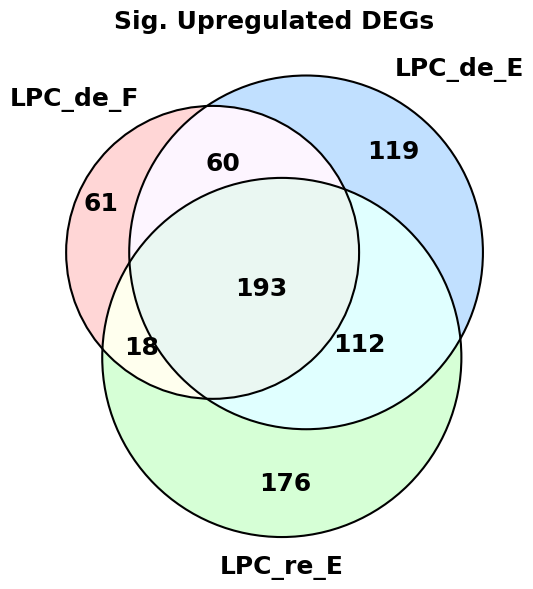

In [59]:
# Define the colors for each set
colors = ('#ff9999', '#66b3ff', '#99ff99')  # Example colors (red, blue, green)

# Create the figure
plt.figure(figsize=(7,7))

# Create the Venn diagram with custom colors
venn = venn3([set_LPC_de_F_up, set_LPC_de_E_up, set_LPC_re_E_up], 
             ('LPC_de_F', 'LPC_de_E', 'LPC_re_E'),
             set_colors=colors)

# Customize font size and weight
for text in venn.set_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

for text in venn.subset_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

# Customize circle weight
venn3_circles([set_LPC_de_F_up, set_LPC_de_E_up, set_LPC_re_E_up], linewidth=1.5)  # Adjust circle thickness

# Title
plt.title("Sig. Upregulated DEGs", fontsize=18, fontweight='bold')
plt.savefig("venn3_MOL_LPC_up.png", dpi=300, bbox_inches='tight')  # Saves with high resolution

# Show the plot
plt.show()

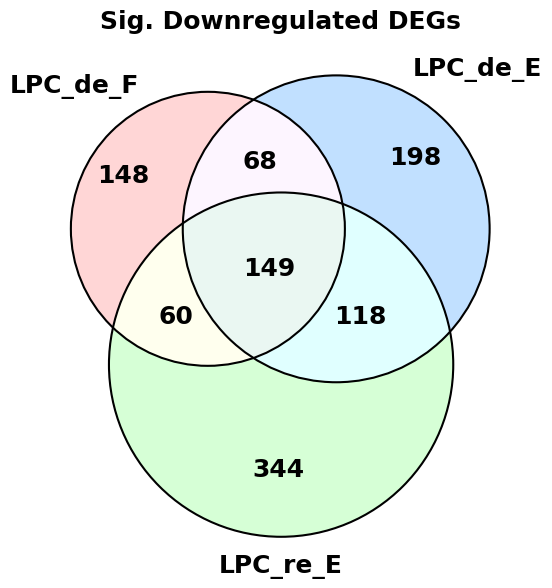

In [60]:
# Define the colors for each set
colors = ('#ff9999', '#66b3ff', '#99ff99')  # Example colors (red, blue, green)

# Create the figure
plt.figure(figsize=(7,7))

# Create the Venn diagram with custom colors
venn = venn3([set_LPC_de_F_down, set_LPC_de_E_down, set_LPC_re_E_down], 
             ('LPC_de_F', 'LPC_de_E', 'LPC_re_E'),
             set_colors=colors)

# Customize font size and weight
for text in venn.set_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

for text in venn.subset_labels:
    if text:  # Check if text exists
        text.set_fontsize(18)
        text.set_fontweight('bold')

# Customize circle weight
venn3_circles([set_LPC_de_F_down, set_LPC_de_E_down, set_LPC_re_E_down], linewidth=1.5)  # Adjust circle thickness

# Title
plt.title("Sig. Downregulated DEGs", fontsize=18, fontweight='bold')
plt.savefig("venn3_MOL_LPC_down.png", dpi=300, bbox_inches='tight')  # Saves with high resolution

# Show the plot
plt.show()

# Upset plots

In [21]:
## IMPORTANT FILTER FOR GENES TESTING IN ALL CONDITIONS

genes_all_conditions = set(OPC_demyel['gene']) & \
                       set(LPC_demyel_F['gene']) & \
                       set(LPC_demyel_E['gene']) & \
                       set(LPC_remyel_E['gene']) & \
                       set(Cupr_demyel_G['gene']) & \
                       set(Cupr_remyel_E['gene'])

In [22]:
from upsetplot import plot
from upsetplot import from_contents
from upsetplot import UpSet

In [23]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
OPC_de_up = filter_genes(OPC_de_up)
LPC_de_F_up = filter_genes(LPC_de_F_up)
LPC_de_E_up = filter_genes(LPC_de_E_up)
LPC_re_E_up = filter_genes(LPC_re_E_up)
Cupr_de_G_up = filter_genes(Cupr_de_G_up)
Cupr_re_E_up = filter_genes(Cupr_re_E_up)

print(OPC_de_up.shape)
print(LPC_de_F_up.shape)
print(LPC_de_E_up.shape)
print(LPC_re_E_up.shape)
print(Cupr_de_G_up.shape)
print(Cupr_re_E_up.shape)

(377, 7)
(132, 7)
(184, 7)
(159, 7)
(566, 7)
(11, 7)


In [24]:
# Create gene lists from the new DataFrames
genes_OPC_de_up = OPC_de_up['gene'].tolist()
genes_LPC_de_F_up = LPC_de_F_up['gene'].tolist()
genes_LPC_de_E_up = LPC_de_E_up['gene'].tolist()
genes_LPC_re_E_up = LPC_re_E_up['gene'].tolist()
genes_Cupr_de_G_up = Cupr_de_G_up['gene'].tolist()
genes_Cupr_re_E_up = Cupr_re_E_up['gene'].tolist()

# Define a function to create a DataFrame with a 'Name' column and a specific label
def create_gene_df(genes_list, column_name):
    return pd.DataFrame({'Name': genes_list, column_name: True})

# Create DataFrames for each gene list with their respective labels
OPC_de_up_df = create_gene_df(genes_OPC_de_up, 'OPC_de_up')
LPC_de_F_up_df = create_gene_df(genes_LPC_de_F_up, 'LPC_de_F_up')
LPC_de_E_up_df = create_gene_df(genes_LPC_de_E_up, 'LPC_de_E_up')
LPC_re_E_up_df = create_gene_df(genes_LPC_re_E_up, 'LPC_re_E_up')
Cupr_de_G_up_df = create_gene_df(genes_Cupr_de_G_up, 'Cupr_de_G_up')
Cupr_re_E_up_df = create_gene_df(genes_Cupr_re_E_up, 'Cupr_re_E_up')

In [25]:
Cupr_re_E_up_df[:5]

,Name,Cupr_re_E_up
0,C4b,True
1,Serpina3n,True
2,Masp1,True
3,Tma16,True
4,Marcksl1,True


In [26]:
# Merge all the DataFrames hierarchically
up_df = OPC_de_up_df.merge(
    LPC_de_F_up_df.merge(
        LPC_de_E_up_df.merge(
            LPC_re_E_up_df.merge(
                Cupr_de_G_up_df.merge(
                    Cupr_re_E_up_df, on='Name', how='outer'
                ), on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
up_df = up_df.fillna(False)

# Set index for the data frame
up_df_plot = up_df.set_index(['OPC_de_up', 'LPC_de_F_up', 'LPC_de_E_up', 'LPC_re_E_up', 'Cupr_de_G_up', 'Cupr_re_E_up'])


# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df_plot)

Upregulated genes DataFrame:
                                                                                  Name
OPC_de_up LPC_de_F_up LPC_de_E_up LPC_re_E_up Cupr_de_G_up Cupr_re_E_up               
False     False       False       False       True         False         0610010K14Rik
          True        True        False       False        False         0610012G03Rik
          False       False       False       True         False         1110004F10Rik
True      False       False       True        False        False         1110008P14Rik
False     False       False       False       True         False         1110038F14Rik
...                                                                                ...
                      True        False       False        False               Zfyve27
                      False       False       True         False                 Zmat3
                                                           False                 Zmiz1
True      Fals

/tmp/1209587.1.gpu/ipykernel_3334999/1689558848.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df = up_df.fillna(False)


In [27]:
print(up_df.columns)

Index(['Name', 'OPC_de_up', 'LPC_de_F_up', 'LPC_de_E_up', 'LPC_re_E_up',
       'Cupr_de_G_up', 'Cupr_re_E_up'],
      dtype='object')


In [28]:
# Dictionary to map old index names to new index names
index_name_map = {
    'OPC_de_up': 'LPC_demyel_OPCs',
    'LPC_de_F_up': 'LPC_demyel_MOL_F',
    'LPC_de_E_up': 'LPC_demyel_MOL_E',
    'LPC_re_E_up': 'LPC_remyel_MOL_E',
    'Cupr_de_G_up': 'Cupr_demyel_MOL_G',
    'Cupr_re_E_up': 'Cupr_remyel_MOL_E',
}

# Rename the index levels using the dictionary
up_df_plot.index = up_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(up_df_plot)

Updated Upregulated genes DataFrame:
                                                                                                                 Name
LPC_demyel_OPCs LPC_demyel_MOL_F LPC_demyel_MOL_E LPC_remyel_MOL_E Cupr_demyel_MOL_G Cupr_remyel_MOL_E               
False           False            False            False            True              False              0610010K14Rik
                True             True             False            False             False              0610012G03Rik
                False            False            False            True              False              1110004F10Rik
True            False            False            True             False             False              1110008P14Rik
False           False            False            False            True              False              1110038F14Rik
...                                                                                                               ...
                   

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

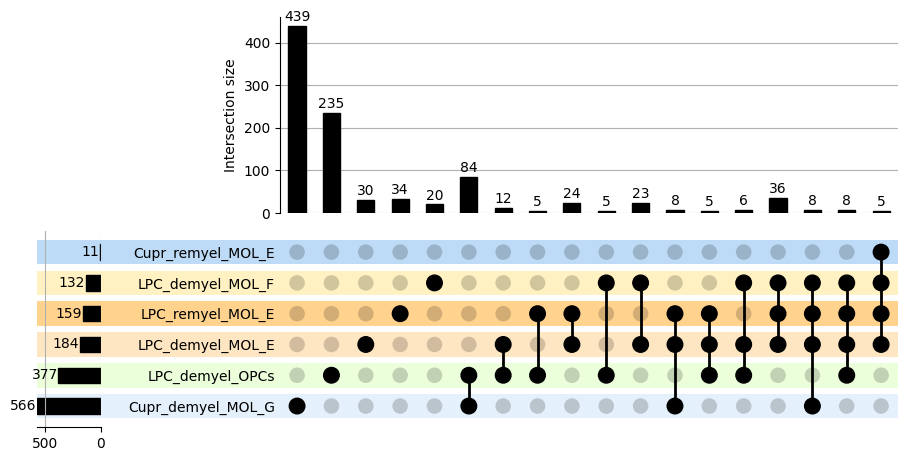

In [31]:
# Create UpSet plot
upset = UpSet(up_df_plot, subset_size='count', show_counts=True, facecolor="black", 
              min_degree=1, min_subset_size=5)

# Style the subsets
upset.style_categories(
    'LPC_demyel_OPCs',
    shading_facecolor="#ecffdb",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_MOL_E',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_MOL_E',
    shading_facecolor="#bddbf6",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/upset_Up_MOL_OPC_combined_n10_logFC1.5_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [32]:
# Merge all the DataFrames hierarchically
up_df = LPC_de_F_up_df.merge(
    LPC_de_E_up_df.merge(
        LPC_re_E_up_df.merge(
            Cupr_de_G_up_df.merge(
                Cupr_re_E_up_df, on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
up_df = up_df.fillna(False)

# Set index for the data frame
up_df_plot = up_df.set_index(['LPC_de_F_up', 'LPC_de_E_up', 'LPC_re_E_up', 'Cupr_de_G_up', 'Cupr_re_E_up'])


# Print the merged DataFrame
print("Upregulated genes DataFrame:")
print(up_df_plot)

Upregulated genes DataFrame:
                                                                        Name
LPC_de_F_up LPC_de_E_up LPC_re_E_up Cupr_de_G_up Cupr_re_E_up               
False       False       False       True         False         0610010K14Rik
True        True        False       False        False         0610012G03Rik
False       False       False       True         False         1110004F10Rik
                        True        False        False         1110008P14Rik
                        False       True         False         1110038F14Rik
...                                                                      ...
                                                 False                 Zfpl1
            True        False       False        False               Zfyve27
            False       False       True         False                 Zmat3
                                                 False                 Zmiz1
                                               

/tmp/1209587.1.gpu/ipykernel_3327910/2561409921.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  up_df = up_df.fillna(False)


In [33]:
# Dictionary to map old index names to new index names
index_name_map = {
    'LPC_de_F_up': 'LPC_demyel_MOL_F',
    'LPC_de_E_up': 'LPC_demyel_MOL_E',
    'LPC_re_E_up': 'LPC_remyel_MOL_E',
    'Cupr_de_G_up': 'Cupr_demyel_MOL_G',
    'Cupr_re_E_up': 'Cupr_remyel_MOL_E',
}

# Rename the index levels using the dictionary
up_df_plot.index = up_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(up_df_plot)

Updated Upregulated genes DataFrame:
                                                                                                 Name
LPC_demyel_MOL_F LPC_demyel_MOL_E LPC_remyel_MOL_E Cupr_demyel_MOL_G Cupr_remyel_MOL_E               
False            False            False            True              False              0610010K14Rik
True             True             False            False             False              0610012G03Rik
False            False            False            True              False              1110004F10Rik
                                  True             False             False              1110008P14Rik
                                  False            True              False              1110038F14Rik
...                                                                                               ...
                                                                     False                      Zfpl1
                 True             False      

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

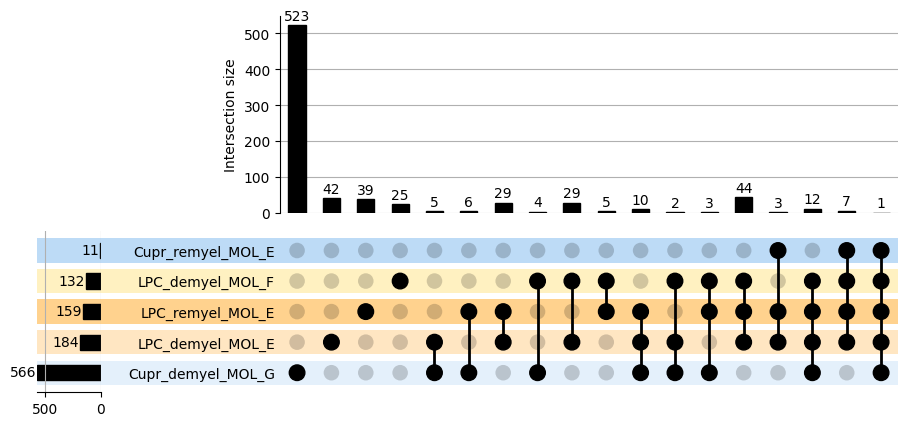

In [35]:
# Create UpSet plot
upset = UpSet(up_df_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1, min_subset_size=1)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_MOL_E',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_MOL_E',
    shading_facecolor="#bddbf6",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
#plt.savefig('./figures/MOL_ONLY_upset_plot_UP_NEW.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

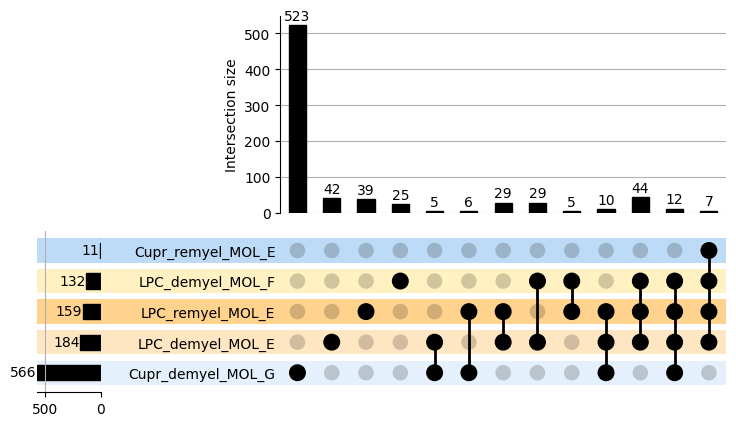

In [38]:
# Create UpSet plot
upset = UpSet(up_df_plot, subset_size='count', show_counts=True, facecolor="black", min_degree=1, min_subset_size=5)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_MOL_E',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_MOL_E',
    shading_facecolor="#bddbf6",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/MOL_ONLY_upset_plot_UP_logFC1.5_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

# Now down

In [28]:
# Function to filter DE DataFrames to include only genes tested in all conditions
def filter_genes(df):
    return df[df['gene'].isin(genes_all_conditions)]

# Apply filtering to each DEG DataFrame
OPC_de_down = filter_genes(OPC_de_down)
LPC_de_F_down = filter_genes(LPC_de_F_down)
LPC_de_E_down = filter_genes(LPC_de_E_down)
LPC_re_E_down = filter_genes(LPC_re_E_down)
Cupr_de_G_down = filter_genes(Cupr_de_G_down)
Cupr_re_E_down = filter_genes(Cupr_re_E_down)

print(OPC_de_down.shape)
print(LPC_de_F_down.shape)
print(LPC_de_E_down.shape)
print(LPC_re_E_down.shape)
print(Cupr_de_G_down.shape)
print(Cupr_re_E_down.shape)

(353, 7)
(245, 7)
(309, 7)
(309, 7)
(625, 7)
(1, 7)


In [29]:
# Create gene lists from the new DataFrames
genes_OPC_de_down = OPC_de_down['gene'].tolist()
genes_LPC_de_F_down = LPC_de_F_down['gene'].tolist()
genes_LPC_de_E_down = LPC_de_E_down['gene'].tolist()
genes_LPC_re_E_down = LPC_re_E_down['gene'].tolist()
genes_Cupr_de_G_down = Cupr_de_G_down['gene'].tolist()
genes_Cupr_re_E_down = Cupr_re_E_down['gene'].tolist()

# Define a function to create a DataFrame with a 'Name' column and a specific label
def create_gene_df(genes_list, column_name):
    return pd.DataFrame({'Name': genes_list, column_name: True})

# Create DataFrames for each gene list with their respective labels
OPC_de_down_df = create_gene_df(genes_OPC_de_down, 'OPC_de_down')
LPC_de_F_down_df = create_gene_df(genes_LPC_de_F_down, 'LPC_de_F_down')
LPC_de_E_down_df = create_gene_df(genes_LPC_de_E_down, 'LPC_de_E_down')
LPC_re_E_down_df = create_gene_df(genes_LPC_re_E_down, 'LPC_re_E_down')
Cupr_de_G_down_df = create_gene_df(genes_Cupr_de_G_down, 'Cupr_de_G_down')
Cupr_re_E_down_df = create_gene_df(genes_Cupr_re_E_down, 'Cupr_re_E_down')

# Merge all the DataFrames hierarchically
down_df = OPC_de_down_df.merge(
    LPC_de_F_down_df.merge(
        LPC_de_E_down_df.merge(
            LPC_re_E_down_df.merge(
                Cupr_de_G_down_df.merge(
                    Cupr_re_E_down_df, on='Name', how='outer'
                ), on='Name', how='outer'
            ), on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
down_df = down_df.fillna(False)

# Set index for the data frame
down_df_plot = down_df.set_index(['OPC_de_down', 'LPC_de_F_down', 'LPC_de_E_down', 'LPC_re_E_down', 
                                  'Cupr_de_G_down', 'Cupr_re_E_down'])

# Print the merged DataFrame
print("Downregulated genes DataFrame:")
print(down_df_plot)

Downregulated genes DataFrame:
                                                                                              Name
OPC_de_down LPC_de_F_down LPC_de_E_down LPC_re_E_down Cupr_de_G_down Cupr_re_E_down               
False       False         False         False         True           False           1500004A13Rik
                                                                     False           1700047M11Rik
                                                                     False           2210408I21Rik
True        False         False         False         False          False           2610035D17Rik
                                                                     False           2810403D21Rik
...                                                                                            ...
False       False         False         True          False          False                   Zmym2
                                        False         True           False    

/tmp/1209587.1.gpu/ipykernel_3334999/2357098685.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df = down_df.fillna(False)


In [136]:
print(down_df.columns)

Index(['Name', 'OPC_de_down', 'LPC_de_F_down', 'LPC_de_E_down',
       'LPC_re_E_down', 'Cupr_de_G_down'],
      dtype='object')


In [141]:
# Dictionary to map old index names to new index names
index_name_map = {
    'OPC_de_down': 'LPC_demyel_OPCs',
    'LPC_de_F_down': 'LPC_demyel_MOL_F',
    'LPC_de_E_down': 'LPC_demyel_MOL_E',
    'LPC_re_E_down': 'LPC_remyel_MOL_E',
    'Cupr_de_G_down': 'Cupr_demyel_MOL_G',
    'Cupr_re_E_down': 'Cupr_remyel_MOL_E',
}

# Rename the index levels using the dictionary
down_df_plot.index = down_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(down_df_plot)

Updated Upregulated genes DataFrame:
                                                                                                                 Name
LPC_demyel_OPCs LPC_demyel_MOL_F LPC_demyel_MOL_E LPC_remyel_MOL_E Cupr_demyel_MOL_G Cupr_remyel_MOL_E               
False           False            False            False            True              False              1500004A13Rik
                                                                                     False              1700047M11Rik
                                                                                     False              2210408I21Rik
True            False            False            False            False             False              2610035D17Rik
                                                                                     False              2810403D21Rik
...                                                                                                               ...
                   

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

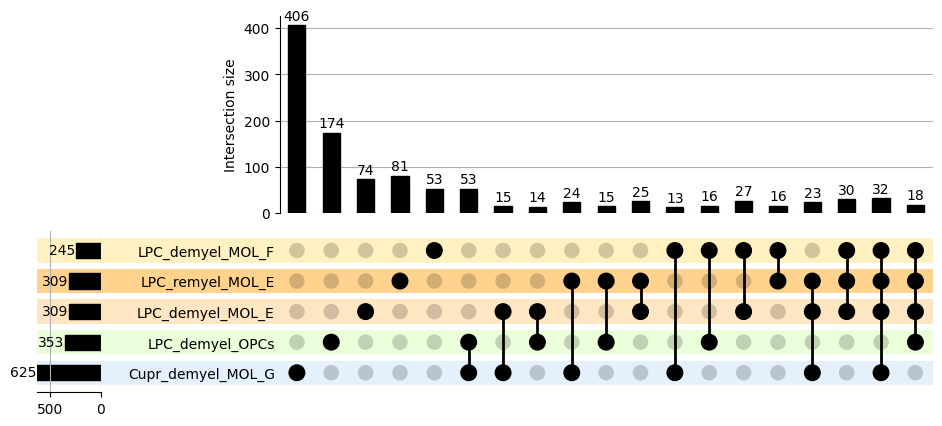

In [44]:
# Create UpSet plot
upset = UpSet(down_df_plot, subset_size='count', show_counts=True, facecolor="black", 
              min_degree=1, min_subset_size=10)

# Style the subsets
upset.style_categories(
    'LPC_demyel_OPCs',
    shading_facecolor="#ecffdb",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_MOL_E',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_MOL_E',
    shading_facecolor="#bddbf6",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/upset_Down_MOL_OPC_combined_n10_logFC1.5_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [45]:
# Merge all the DataFrames hierarchically
down_df = LPC_de_F_down_df.merge(
    LPC_de_E_down_df.merge(
        LPC_re_E_down_df.merge(
                Cupr_de_G_down_df, on='Name', how='outer'
        ), on='Name', how='outer'
    ), on='Name', how='outer'
)

# Replace NaN with False
down_df = down_df.fillna(False)

# Set index for the data frame
down_df_plot = down_df.set_index(['LPC_de_F_down', 'LPC_de_E_down', 'LPC_re_E_down', 'Cupr_de_G_down'])

# Print the merged DataFrame
print("Downregulated genes DataFrame:")
print(down_df_plot)

Downregulated genes DataFrame:
                                                                   Name
LPC_de_F_down LPC_de_E_down LPC_re_E_down Cupr_de_G_down               
False         False         False         True            1500004A13Rik
                                          True            1700047M11Rik
                                          True            2210408I21Rik
                                          True            2810410L24Rik
                                          True            2810468N07Rik
...                                                                 ...
                                          True                     Zhx3
                            True          False                   Zmym2
                            False         True                    Zmym4
                                          True                   Zmynd8
                                          True                    Zzef1

[1010 rows x 1 columns]


/tmp/1209587.1.gpu/ipykernel_3327910/2350997631.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  down_df = down_df.fillna(False)


In [46]:
# Dictionary to map old index names to new index names
index_name_map = {
    #'OPC_de_down': 'LPC_demyel_OPCs',
    'LPC_de_F_down': 'LPC_demyel_MOL_F',
    'LPC_de_E_down': 'LPC_demyel_MOL_E',
    'LPC_re_E_down': 'LPC_remyel_MOL_E',
    'Cupr_de_G_down': 'Cupr_demyel_MOL_G'
}

# Rename the index levels using the dictionary
down_df_plot.index = down_df_plot.index.rename(index_name_map)

print("Updated Upregulated genes DataFrame:")
print(down_df_plot)

Updated Upregulated genes DataFrame:
                                                                               Name
LPC_demyel_MOL_F LPC_demyel_MOL_E LPC_remyel_MOL_E Cupr_demyel_MOL_G               
False            False            False            True               1500004A13Rik
                                                   True               1700047M11Rik
                                                   True               2210408I21Rik
                                                   True               2810410L24Rik
                                                   True               2810468N07Rik
...                                                                             ...
                                                   True                        Zhx3
                                  True             False                      Zmym2
                                  False            True                       Zmym4
                                       

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/edgeR/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

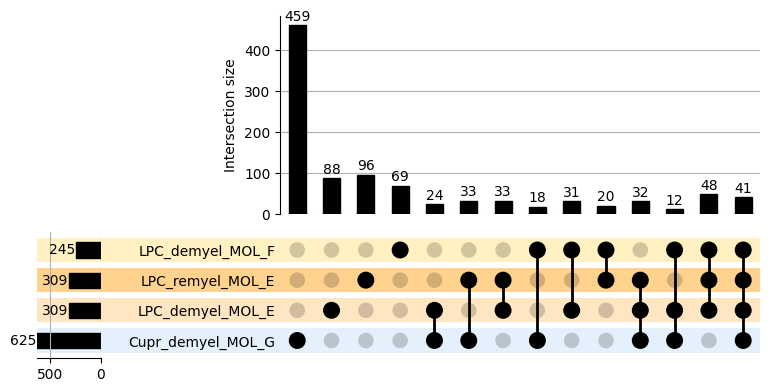

In [48]:
# Create UpSet plot
upset = UpSet(down_df_plot, subset_size='count', show_counts=True, facecolor="black", 
              min_degree=1, min_subset_size=10)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_F',
    shading_facecolor="#fff1c1",
)

# Style the subsets
upset.style_categories(
    'LPC_demyel_MOL_E',
    shading_facecolor="#ffe6c2",
)

# Style the subsets
upset.style_categories(
    'LPC_remyel_MOL_E',
    shading_facecolor="#ffd28e",
)

# Style the subsets
upset.style_categories(
    'Cupr_demyel_MOL_G',
    shading_facecolor="#e4f0fb",
)

# Style the subsets
upset.style_categories(
    'Cupr_remyel_MOL_E',
    shading_facecolor="#bddbf6",
)

# Plot the UpSet plot
upset.plot()
plt.suptitle("")

# Save the plot as PDF
plt.savefig('./figures/MOL_ONLY_upset_plot_DOWN_logFC1.5_overlapping.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

## Overlapping genes

In [30]:
# Create gene lists from the new DataFrames
genes_OPC_de_up = OPC_de_up['gene'].tolist()
genes_LPC_de_F_up = LPC_de_F_up['gene'].tolist()
genes_LPC_de_E_up = LPC_de_E_up['gene'].tolist()
genes_LPC_re_E_up = LPC_re_E_up['gene'].tolist()
genes_Cupr_de_G_up = Cupr_de_G_up['gene'].tolist()
genes_Cupr_re_E_up = Cupr_re_E_up['gene'].tolist()

In [31]:
# Convert lists to sets for upregulated genes
set_OPC_de = set(genes_OPC_de_up)
set_LPC_de_F = set(genes_LPC_de_F_up)
set_LPC_de_E = set(genes_LPC_de_E_up)
set_LPC_re_E = set(genes_LPC_re_E_up)
set_Cupr_de_up = set(genes_Cupr_de_G_up)
set_Cupr_re_up = set(genes_Cupr_re_E_up)

In [32]:
# Overlap of upregulated genes
unique_Cupr = set_Cupr_de_up - set_LPC_de_F - set_LPC_de_E - set_LPC_re_E - set_Cupr_re_up
print("Number of overlapping upregulated genes:", len(unique_Cupr))
print("Overlapping upregulated genes:", unique_Cupr)

Number of overlapping upregulated genes: 523
Overlapping upregulated genes: {'Ppp1r2', 'Sf3b4', 'Ifrd1', 'Rps2', 'Cript', 'Rpl11', 'Mrps10', 'Hnrnph1', 'Cct7', 'Rps15a', 'Ndufs4', 'Ccdc90b', 'Eny2', 'Mrpl10', 'Ube2i', 'Aff2', 'Rpl5', 'Taf3', 'Psmg2', 'Aurkaip1', 'Luc7l', 'Ndufaf8', 'Rpl18a', 'Nme1', 'Rbm22', 'Ndufab1', 'Cdc37', 'Smarcb1', 'Abtb2', 'Lcmt1', 'Nfu1', 'Serbp1', 'Ebna1bp2', 'Cops8', 'Prpf19', 'Ndufb6', 'Nars', 'Dnaja3', 'Ddit3', 'Manf', 'Arl8b', 'Gar1', 'Map1b', 'Ranbp1', 'Frmd4a', 'Grpel1', 'Rps4x', 'Rps12', 'Nop14', 'Rheb', 'Zcchc9', 'Rpl15', 'Fam104a', 'Crls1', 'Snhg8', 'Zmat3', 'Rpl27', 'Rpl23', 'Ctcf', 'Prmt1', 'Cab39l', 'Mthfd1l', 'Polr2i', 'Rps23', 'Ddx27', 'Znhit1', 'Rpl12', '0610010K14Rik', 'Nucks1', 'Aimp1', 'Rps15', 'Rps25', '2700062C07Rik', 'Rex1bd', 'Zfp639', 'Mrps34', 'Wdr74', 'Papola', '5031425E22Rik', 'Ncoa5', 'Coq9', 'Rpl18', 'Usp31', 'Btf3l4', 'Btbd10', 'Qpct', 'Bccip', 'Cadm1', 'Ube2e1', 'Psma2', 'Gemin7', 'Bloc1s2', 'Kcmf1', 'Ube2v1', 'Glrx5', 'Srebf1', 

In [52]:
# Overlap of upregulated genes
overlap_OPC = set_OPC_de - set_LPC_de_F - set_LPC_de_E - set_LPC_re_E - set_Cupr_de_up - set_Cupr_re_up
print("Number of overlapping upregulated genes:", len(overlap_OPC))
print("Overlapping upregulated genes:", overlap_OPC)

Number of overlapping upregulated genes: 235
Overlapping upregulated genes: {'Tcp1', 'Nfkbia', 'Nras', 'Snapin', 'Gatm', 'Rtf2', 'Mrpl51', 'Psma7', 'Mak16', 'Bola1', 'Mocs2', 'Cdk5', 'Rad23a', 'Samm50', 'Eid1', 'Arhgef10', 'Ttll7', 'Kctd17', 'Cpox', 'Tomm5', 'Map1a', 'Txnl4a', 'Snrpd3', 'Atp6v0e2', 'Ybx3', 'Guk1', 'Micos10', 'Snrpd2', 'Rnf126', 'Nop10', 'Fhl1', 'Dhrs1', 'Ddx54', 'Mrpl53', '1810037I17Rik', 'Mrpl36', 'Pcolce2', 'Rpl41', 'Ift43', 'Prelid1', 'Josd2', 'Cox4i1', 'Tle5', 'Sh3bgrl3', 'S100a16', 'Bpnt1', 'Phf10', 'Mpnd', 'Micos13', 'Rab4b', 'H1f0', 'Lsm14b', 'Prdx2', 'Hist1h2bc', 'Trp53bp2', 'Eloc', 'Agpat4', 'Mrpl54', 'Ube2m', 'Sv2a', 'Mlf2', 'Eif3f', 'Csnk2b', 'Phgdh', 'Taf9b', 'Fbxo2', 'Fundc2', 'Ttc9', 'Ppia', 'Mrps36', 'Map7d1', 'Pgls', 'Gm17018', 'Imp3', 'Pin1', 'Urm1', 'Mrpl34', 'Gtf3a', 'Rala', 'Atp5g1', 'Igsf11', 'Rbx1', 'Get4', 'Pmvk', 'Stmn1', 'Mrpl13', 'Nolc1', 'Ctnna1', 'Bpgm', 'Klf13', 'Psme2', 'Ndufa10', 'Kmt5a', 'Dctn5', 'Selenoh', 'Mrps17', 'Slain1', 'Sec13', '

In [43]:
print("\n".join(overlap_OPC))

Snapin
Rpa2
Taf9b
Glrx3
Snrpn
Selenoh
Nudt4
Klf13
Dnlz
Eif3f
9530026P05Rik
Trp53bp2
Mrps6
Ap1m1
Sdhd
Gm17018
Gm2000
S100a4
Bpnt1
Gm10762
Arpc1a
Mapk8ip1
Tomm5
Samm50
Cox5a
1110038B12Rik
Sdk2
Ssrp1
Vps28
Slc14a1
Nras
Gatd3a
Psmd8
Abracl
Lhfp
Cox4i1
Fbxo2
Clca3a1
Cdc42ep3
Raly
Dcps
Zfp60
Trappc1
Ufm1
Eif3i
Dbndd2
Gnai1
Dctn5
Prdx2
Rsl24d1
Pin1
Alkbh6
Tmbim1
Traf7
Cox5b
Boc
Mpnd
Micos13
Ddah1
Mrpl13
Dmrtb1
Rian
Slc30a7
Ciao1
Myl12b
Fam174b
Ppia
Psma4
Arhgef10
Txndc17
Get4
Psma7
Btf3
Tmod2
Josd2
Ier3
Aldh18a1
Wdr77
Akt1s1
Ndst3
Dazap2
Gatm
Sccpdh
Scn3b
Ciao2b
Trp53
Golga7
Trib1
Zfand1
Coa6
Grsf1
Eif4h
Mocs2
Txnl4a
Eif3l
S100a16
Eid1
Srm
Mphosph10
Chrm2
Nkapd1
Rpl41
Apex1
Mrpl53
Polr2j
Gap43
Ap2m1
Uchl1
Fstl4
Acsbg1
Snhg4
Arhgdig
Tvp23a
Churc1
Parp1
A930003O13Rik
Snhg6
Nop10
Dnajc15
Dcakd
Ctnna1
2210016L21Rik
Ube2m
Ttc9b
Cdh22
Nop9
Casp3
Sv2c
Iqgap1
Ramac
Bin3
Hnrnpdl
Txnrd1
Tcf7l1
Phgdh
Guk1
Ruvbl1
Fhl1
Nop16
Taldo1
Kmt5a
Lap3
Stmn1
Tpi1
Mrpl49
Ttll7
Mroh3
Psme2
Acot7
Psmd3
Vma21
Ptges3
Mi

In [53]:
# Overlap of upregulated genes
overlap_up = set_LPC_de_F & set_LPC_de_E & set_LPC_re_E
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

Number of overlapping upregulated genes: 64
Overlapping upregulated genes: {'Me1', 'Gm10863', 'S100a6', 'Kirrel3', 'Fam13c', 'Scrn1', 'Mt2', 'Rhoc', 'Masp1', 'Lmna', 'Plpp3', 'Ndst1', 'Rhoj', 'Cstb', '1700025G04Rik', 'H2-D1', 'Tafa5', 'Cerk', 'Fbl', 'Pcyt2', 'Tulp4', 'Rusc2', 'Sik3', 'C4b', 'Crtac1', 'Csf1', 'Asap2', 'Cic', 'Cd63', 'Lrrc49', 'S100a1', 'Slc44a1', 'Rnf122', 'Gpd1', 'Phlda1', 'Cldn11', 'Tma16', 'Ifi27', 'Astn2', 'Sulf2', 'Bmp1', 'Fabp5', 'Spsb1', 'Pik3r3', 'Rundc3a', 'Cntn3', 'Tle3', 'Anks1b', 'Cntfr', 'Tubb3', 'Mt1', 'Prxl2b', '2810410L24Rik', 'Lbh', 'Gnb4', 'Stat3', 'Slc39a1', 'Lrrc8c', 'Gadd45g', 'Epha4', 'Arpc1b', 'Serpina3n', 'Msra', 'Apoe'}


In [83]:
overlap_Cupr_not_LPC = (set_LPC_de_F & set_LPC_de_E & set_LPC_re_E) - (set_Cupr_de_up | set_Cupr_re_up)

# Print the number of overlapping genes and the genes
print("Number of genes overlapping between MS_de and Cupr_de but not LPC_de:", len(overlap_Cupr_not_LPC))
print("Genes overlapping:", overlap_Cupr_not_LPC)

Number of genes overlapping between MS_de and Cupr_de but not LPC_de: 44
Genes overlapping: {'Me1', 'Gm10863', 'Fam13c', 'Kirrel3', 'Scrn1', 'Ndst1', 'Cstb', 'Cerk', 'Pcyt2', 'Tafa5', 'Fbl', 'Sik3', '1700025G04Rik', 'Tulp4', 'Rusc2', 'Crtac1', 'H2-D1', 'Csf1', 'Asap2', 'Cic', 'Lrrc49', 'S100a1', 'Slc44a1', 'Gpd1', 'Phlda1', 'Cldn11', 'Ifi27', 'Sulf2', 'Fabp5', 'Spsb1', 'Pik3r3', 'Rundc3a', 'Cntn3', 'Anks1b', 'Cntfr', 'Prxl2b', '2810410L24Rik', 'Gnb4', 'Stat3', 'Slc39a1', 'Gadd45g', 'Epha4', 'Msra', 'Apoe'}


In [55]:
# Overlap of upregulated genes
overlap_up = set_LPC_de_F & set_LPC_de_E & set_LPC_re_E & set_Cupr_de_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

Number of overlapping upregulated genes: 13
Overlapping upregulated genes: {'S100a6', 'Lmna', 'Rhoc', 'Mt2', 'Cd63', 'Lrrc8c', 'Arpc1b', 'Plpp3', 'Tle3', 'Tubb3', 'Serpina3n', 'Mt1', 'Lbh'}


In [56]:
# Overlap of upregulated genes
overlap_up = set_LPC_de_F & set_LPC_de_E & set_LPC_re_E & set_Cupr_de_up - set_Cupr_re_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

Number of overlapping upregulated genes: 12
Overlapping upregulated genes: {'S100a6', 'Lmna', 'Rhoc', 'Mt2', 'Cd63', 'Lrrc8c', 'Arpc1b', 'Plpp3', 'Tle3', 'Tubb3', 'Mt1', 'Lbh'}


In [57]:
# Overlap of upregulated genes
overlap_up = set_LPC_de_F & set_LPC_de_E & set_LPC_re_E & set_Cupr_de_up & set_Cupr_re_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

Number of overlapping upregulated genes: 1
Overlapping upregulated genes: {'Serpina3n'}


# Add GSEA info

In [34]:
GSEA_LPC_de_F = pd.read_csv('./files/filtered_fgseaResSignificant_LPC_demyel_MOL_F_NEW.csv', index_col=None)
GSEA_LPC_de_E = pd.read_csv('./files/filtered_fgseaResSignificant_LPC_demyel_MOL_E_NEW.csv', index_col=None)
GSEA_LPC_re_E = pd.read_csv('./files/filtered_fgseaResSignificant_LPC_remyel_MOL_E_NEW.csv', index_col=None)
GSEA_Cupr_de_G = pd.read_csv('./files/filtered_fgseaResSignificant_Cupr_demyel_MOL_G_NEW.csv', index_col=None)

In [37]:
print(GSEA_LPC_de_F.shape)
print(GSEA_LPC_de_E.shape)
print(GSEA_LPC_re_E.shape)
print(GSEA_Cupr_de_G.shape)

(4, 2)
(7, 8)
(15, 8)
(9, 8)


In [38]:
# Extract the relevant columns
GSEA_LPC_de_F = GSEA_LPC_de_F[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_LPC_de_F['leadingEdge'] = GSEA_LPC_de_F['leadingEdge'].str.replace('|', ',')
GSEA_LPC_de_F[:5]

,pathway,leadingEdge
0,HALLMARK_APICAL_JUNCTION,"Col16a1,Inppl1,Nlgn2,Tspan4,Ldlrap1,Flnc,Cldn1..."
1,HALLMARK_ESTROGEN_RESPONSE_LATE,"Serpina3n,Snx10,Farp1,Cpe,Aldh3b1,Cd9,Add3,Ccn..."
2,HALLMARK_INTERFERON_GAMMA_RESPONSE,"Irf9,Mt2,Nlrc5,Eif2ak2,Socs3,Rtp4,H2-D1,Parp12..."
3,HALLMARK_TNFA_SIGNALING_VIA_NFKB,"Cebpd,Bcl3,Socs3,Ehd1,Fjx1,Gadd45b,Phlda1,Gadd..."


In [39]:
# Extract the relevant columns
GSEA_LPC_de_E = GSEA_LPC_de_E[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_LPC_de_E['leadingEdge'] = GSEA_LPC_de_E['leadingEdge'].str.replace('|', ',')


# Extract the relevant columns
GSEA_LPC_re_E = GSEA_LPC_re_E[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_LPC_re_E['leadingEdge'] = GSEA_LPC_re_E['leadingEdge'].str.replace('|', ',')


# Extract the relevant columns
GSEA_Cupr_de_G = GSEA_Cupr_de_G[['pathway', 'leadingEdge']].copy()

# Convert '|' separated genes in 'leadingEdge' to ',' separated
GSEA_Cupr_de_G['leadingEdge'] = GSEA_Cupr_de_G['leadingEdge'].str.replace('|', ',')
GSEA_Cupr_de_G[:5]

,pathway,leadingEdge
0,HALLMARK_APICAL_JUNCTION,"Ppp2r2c,Gamt,Itgb4,Insig1,Ptk2,Cldn11,Jam3,Nfa..."
1,HALLMARK_E2F_TARGETS,"Cdkn1a,Ube2s,Mthfd2,Nasp,Pole4,Phf5a,Ran,Hnrnp..."
2,HALLMARK_MTORC1_SIGNALING,"Ddit3,Eif2s2,Nupr1,Cdkn1a,Mthfd2,Slc7a5,Eef1e1..."
3,HALLMARK_MYC_TARGETS_V1,"Eif2s2,Serbp1,Srsf3,Ifrd1,Ube2e1,Hnrnpc,Rack1,..."
4,HALLMARK_OXIDATIVE_PHOSPHORYLATION,"Bax,Hspa9,Surf1,Cycs,Uqcrq,Iscu,Timm17a,Phb2,A..."


In [40]:
pathway_list_LPC_deF = GSEA_LPC_de_F['pathway'].tolist()
print(pathway_list_LPC_deF)

['HALLMARK_APICAL_JUNCTION', 'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB']


In [41]:
pathway_list_LPC_deE = GSEA_LPC_de_E['pathway'].tolist()
print(pathway_list_LPC_deE)

['HALLMARK_APICAL_JUNCTION', 'HALLMARK_COAGULATION', 'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_HEME_METABOLISM', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_KRAS_SIGNALING_UP', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB']


In [42]:
pathway_list_LPC_reE = GSEA_LPC_re_E['pathway'].tolist()
print(pathway_list_LPC_reE)

['HALLMARK_APICAL_JUNCTION', 'HALLMARK_APOPTOSIS', 'HALLMARK_COAGULATION', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_ESTROGEN_RESPONSE_LATE', 'HALLMARK_GLYCOLYSIS', 'HALLMARK_HYPOXIA', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_INTERFERON_ALPHA_RESPONSE', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_KRAS_SIGNALING_UP', 'HALLMARK_MITOTIC_SPINDLE', 'HALLMARK_P53_PATHWAY', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_UV_RESPONSE_UP']


In [43]:
pathway_list_Cupr_deG = GSEA_Cupr_de_G['pathway'].tolist()
print(pathway_list_Cupr_deG)

['HALLMARK_APICAL_JUNCTION', 'HALLMARK_E2F_TARGETS', 'HALLMARK_MTORC1_SIGNALING', 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_P53_PATHWAY', 'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE']


### Go after TNFa

In [46]:
union_all_tnf = (set_LPC_de_F | set_LPC_de_E | set_LPC_re_E | set_Cupr_de_up)

# Print the number of overlapping genes and the genes
print("Number of genes overlapping:", len(union_all_tnf))
print("Genes overlapping:", union_all_tnf)

Number of genes overlapping: 789
Genes overlapping: {'Ppp1r2', 'Sf3b4', 'Dgki', 'Ifrd1', 'Rps2', 'Cript', 'Rpl11', 'Mrps10', 'Msra', 'Mt2', 'Ralgps1', 'Ppp2r5a', '1700025G04Rik', 'Hunk', 'Hnrnph1', 'Rad23b', 'Cct7', 'Rps15a', 'Ndufs4', 'Acot1', 'Ccdc90b', 'Eny2', 'Mrpl10', 'Ube2i', 'Aff2', 'Rpl5', 'Taf3', 'Rusc2', 'Psmg2', 'Aurkaip1', 'Luc7l', 'Ifi27', 'Ndufaf8', 'Rpl18a', 'Nme1', 'Tiparp', 'Rbm22', 'Ndufab1', 'Cdc37', 'Smarcb1', 'Abtb2', 'Lcmt1', 'Nfu1', 'Nhp2', 'Serbp1', 'Ebna1bp2', 'Cops8', 'Prpf19', 'Abhd11', 'Ndufb6', 'Nars', 'Dnaja3', 'Prune2', 'Ddit3', 'Manf', 'Iars', 'Arl8b', 'Cic', 'Gar1', 'Map1b', 'Ranbp1', 'Tceal8', 'Lgmn', 'Frmd4a', 'Map1lc3a', 'Grpel1', 'Rps4x', 'Rps12', 'Cdr2l', 'Nop14', 'Grina', 'Ehd1', 'Rheb', 'Nfasc', 'Atxn1', 'Zcchc9', 'Rpl15', 'Map2k1', 'Fam104a', 'Bnip3l', 'Map6', 'Crls1', 'Snhg8', 'Zmat3', 'Rpl27', 'Gadd45g', 'Rpl23', 'Ctcf', 'Prmt1', 'Cab39l', 'Tma16', 'Csf1', 'Cerk', 'Mthfd1l', 'Polr2i', 'Ten1', 'Prxl2b', 'Rps23', 'Serpinb6a', 'Ddx27', 'Znhit1', 

In [47]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_de_F.loc[GSEA_LPC_de_F['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    union_all_tnf = {gene.strip().upper() for gene in union_all_tnf}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & union_all_tnf

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_TNFA_SIGNALING_VIA_NFKB: {'TIPARP', 'CSF1', 'FOS', 'PHLDA1', 'PLPP3', 'EHD1'}


In [48]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_de_E.loc[GSEA_LPC_de_E['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    union_all_tnf = {gene.strip().upper() for gene in union_all_tnf}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & union_all_tnf

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_TNFA_SIGNALING_VIA_NFKB: {'SPSB1', 'EHD1', 'CSF1', 'PLPP3', 'PHLDA1'}


In [49]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_re_E.loc[GSEA_LPC_re_E['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    union_all_tnf = {gene.strip().upper() for gene in union_all_tnf}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & union_all_tnf

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_TNFA_SIGNALING_VIA_NFKB: {'SPSB1', 'ABCA1', 'CSF1', 'FOS', 'PLPP3', 'PHLDA1'}


In [50]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_TNFA_SIGNALING_VIA_NFKB'

# Filter for the specified pathway
pathway_genes_series = GSEA_Cupr_de_G.loc[GSEA_Cupr_de_G['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    union_all_tnf = {gene.strip().upper() for gene in union_all_tnf}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & union_all_tnf

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_TNFA_SIGNALING_VIA_NFKB: {'KLF9', 'FOS', 'JUN'}


In [44]:
set_Cupr_re_up

{'Astn2',
 'Bmp1',
 'C4b',
 'Gm13889',
 'Marcksl1',
 'Masp1',
 'Plekha1',
 'Rhoj',
 'Rnf122',
 'Serpina3n',
 'Tma16'}

In [114]:
overlap_EF = (set_LPC_de_F & set_LPC_de_E & set_LPC_re_E & set_Cupr_re_up) - (set_Cupr_de_up)

# Print the number of overlapping genes and the genes
print("Number of genes overlapping:", len(overlap_EF))
print("Genes overlapping:", overlap_EF)

Number of genes overlapping: 7
Genes overlapping: {'C4b', 'Tma16', 'Astn2', 'Bmp1', 'Masp1', 'Rhoj', 'Rnf122'}


In [104]:
overlap_Cupr_not_LPC = (set_LPC_de_F & set_LPC_de_E & set_LPC_re_E) - (set_Cupr_de_up | set_Cupr_re_up)

# Print the number of overlapping genes and the genes
print("Number of genes overlapping between MS_de and Cupr_de but not LPC_de:", len(overlap_Cupr_not_LPC))
print("Genes overlapping:", overlap_Cupr_not_LPC)

Number of genes overlapping between MS_de and Cupr_de but not LPC_de: 44
Genes overlapping: {'Me1', 'Gm10863', 'Fam13c', 'Kirrel3', 'Scrn1', 'Ndst1', 'Cstb', 'Cerk', 'Pcyt2', 'Tafa5', 'Fbl', 'Sik3', '1700025G04Rik', 'Tulp4', 'Rusc2', 'Crtac1', 'H2-D1', 'Csf1', 'Asap2', 'Cic', 'Lrrc49', 'S100a1', 'Slc44a1', 'Gpd1', 'Phlda1', 'Cldn11', 'Ifi27', 'Sulf2', 'Fabp5', 'Spsb1', 'Pik3r3', 'Rundc3a', 'Cntn3', 'Anks1b', 'Cntfr', 'Prxl2b', '2810410L24Rik', 'Gnb4', 'Stat3', 'Slc39a1', 'Gadd45g', 'Epha4', 'Msra', 'Apoe'}


In [105]:
union_LPC = (set_LPC_de_F | set_LPC_de_E | set_LPC_re_E) - (set_Cupr_de_up)

# Print the number of overlapping genes and the genes
print("Number of genes overlapping between MS_de and Cupr_de but not LPC_de:", len(union_LPC))
print("Genes overlapping:", union_LPC)

Number of genes overlapping between MS_de and Cupr_de but not LPC_de: 223
Genes overlapping: {'Gm10863', 'Me1', 'Slco3a1', 'Ralgps1', 'Zfyve27', 'Map2k1', 'Nenf', 'Itgb1bp1', 'Tmem132d', 'Clip3', 'Gpatch2l', 'Rhoj', 'Atp6v1h', 'Cmip', 'Tafa5', 'Abhd4', 'Tmem14a', 'Rap1a', 'Mvb12b', 'Pgs1', 'Extl3', 'Lrrc49', 'Gde1', 'Dgki', 'Ankrd46', 'Cldn11', 'Map1lc3a', 'Abhd17a', 'Arl2', 'Astn2', 'Nipsnap3b', 'Map6', 'Sirt2', 'Dnm2', 'Marcksl1', 'Abca1', 'Tspan2', 'Cln3', 'Fabp5', 'Dynlt3', 'Spsb1', 'Scarb2', 'Pfn1', 'Cntn3', 'Anks1b', 'Gas7', 'Nav2', 'Ptms', 'Cd9', '2810410L24Rik', 'Fkbp1a', 'Ddr1', 'Ankrd28', 'Hist3h2ba', 'S100b', 'Phyhipl', 'Grina', 'Gadd45g', 'Zfp771', 'Serpinb6a', 'Pkp4', 'Rap2a', 'Zfp706', 'Ehd1', 'Pepd', 'Tsc22d4', 'Kirrel3', 'Fam117b', 'Cstb', 'Prune2', '0610012G03Rik', 'Ywhaz', 'Atxn1', 'Ppp2r2a', '1700025G04Rik', 'H2-D1', 'H2afj', 'Gsn', 'Iars', 'Nfasc', 'Tulp4', 'Ankrd13a', 'Plekha1', 'Asap2', 'Cic', 'Dync1li1', 'Ncbp2', 'Lsm2', 'Arpc5', 'Tjap1', '1110008P14Rik', 'Dusp15

In [106]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_de_F.loc[GSEA_LPC_de_F['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    union_LPC = {gene.strip().upper() for gene in union_LPC}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & union_LPC

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_INTERFERON_GAMMA_RESPONSE: {'IFI27', 'STAT3', 'H2-D1'}


In [107]:
pathway_genes

{'B2M',
 'DDX60',
 'EIF2AK2',
 'H2-D1',
 'IFI27',
 'IFI35',
 'IRF9',
 'MT2',
 'NLRC5',
 'PARP12',
 'RTP4',
 'SOCS3',
 'STAT3',
 'USP18',
 'VAMP5'}

In [108]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_de_E.loc[GSEA_LPC_de_E['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    union_LPC = {gene.strip().upper() for gene in union_LPC}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & union_LPC

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_INTERFERON_GAMMA_RESPONSE: {'IFI27', 'STAT3', 'H2-D1'}


In [109]:
pathway_genes

{'B2M',
 'CDKN1A',
 'DDX60',
 'EIF2AK2',
 'GBP3',
 'H2-D1',
 'HERC6',
 'IFI27',
 'IFI35',
 'IRF9',
 'MT2',
 'MVP',
 'PARP12',
 'RNF213',
 'RTP4',
 'SOCS3',
 'STAT1',
 'STAT2',
 'STAT3',
 'TAPBP',
 'USP18',
 'VAMP5'}

In [110]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_re_E.loc[GSEA_LPC_re_E['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    union_LPC = {gene.strip().upper() for gene in union_LPC}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & union_LPC

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_INTERFERON_GAMMA_RESPONSE: {'IFI27', 'STAT3', 'H2-D1'}


In [111]:
pathway_genes

{'B2M',
 'BST2',
 'FGL2',
 'H2-D1',
 'IFI27',
 'IFI35',
 'IRF1',
 'IRF9',
 'MT2',
 'MVP',
 'NLRC5',
 'PARP12',
 'RTP4',
 'SOCS3',
 'STAT1',
 'STAT3',
 'VAMP5',
 'VAMP8'}

In [112]:
def to_sentence_case(gene):
    return gene[0].upper() + gene[1:].lower() if gene else gene

# Convert overlapping_genes to sentence case
overlapping_genes_corrected = {to_sentence_case(gene) for gene in pathway_genes}

# Filter Cupr_demyel_G for overlapping genes
overlapping_genes_df = Cupr_demyel_G[Cupr_demyel_G['gene'].isin(overlapping_genes_corrected)]

# Sort by logFC in descending order
overlapping_genes_df = overlapping_genes_df.sort_values(by='logFC', ascending=False)
overlapping_genes_df

,gene,logFC,AveExpr,t,Pvalue,Padj,B
266,Mt2,3.334824,6.447482,6.648409,0.000011,0.000220,3.600643
2425,Stat3,1.585398,6.119949,1.858741,0.084382,0.178911,-5.270105
3835,Vamp5,0.333390,4.925898,0.848137,0.410741,0.550618,-6.082377
1394,Ifi27,-0.761072,6.527833,-2.908637,0.011523,0.042490,-3.589636


In [74]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_P53_PATHWAY'

# Filter for the specified pathway
pathway_genes_series = GSEA_Cupr_de_G.loc[GSEA_Cupr_de_G['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    unique_Cupr = {gene.strip().upper() for gene in unique_Cupr}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & unique_Cupr

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_P53_PATHWAY: {'ZMAT3', 'DDIT3', 'AEN', 'BAX', 'PHLDA3', 'RPS27L', 'HINT1', 'SLC3A2', 'RACK1', 'RPS12', 'RPL18'}


In [77]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_MYC_TARGETS_V1'

# Filter for the specified pathway
pathway_genes_series = GSEA_Cupr_de_G.loc[GSEA_Cupr_de_G['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    unique_Cupr = {gene.strip().upper() for gene in unique_Cupr}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & unique_Cupr

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_MYC_TARGETS_V1: {'RPS5', 'RPS6', 'CDK4', 'RPL14', 'PHB2', 'RPS2', 'RPLP0', 'PSMB3', 'RRP9', 'HSPE1', 'HNRNPU', 'EIF1AX', 'HNRNPA1', 'CCT7', 'RNPS1', 'RPL18', 'RAN', 'UBE2E1', 'RPL22', 'NDUFAB1', 'PSMA2', 'HNRNPC', 'RPL6', 'NME1', 'SRPK1', 'NPM1', 'DDX21', 'XPOT', 'PSMA6', 'IFRD1', 'SNRPD1', 'SRSF3', 'EIF4G2', 'EPRS', 'SSB', 'CNBP', 'SERBP1', 'GNL3', 'RACK1', 'HNRNPD', 'DDX18', 'PSMD1', 'TRA2B', 'RPS10', 'RPS3', 'MRPL23', 'ERH', 'SRSF7', 'EEF1B2', 'EIF2S2', 'RANBP1'}


In [80]:
Cupr_demyel_G[:3]

,gene,logFC,AveExpr,t,Pvalue,Padj,B
0,Ninj2,-4.607284,6.748263,-26.106902,3.340235e-13,1.718217e-09,20.377248
1,Jph4,-5.682385,3.820698,-23.276673,1.590012e-12,4.089510e-09,18.205062
2,Ptgds,-5.227826,9.807530,-22.131510,3.149304e-12,5.400007e-09,18.467348


In [81]:
def to_sentence_case(gene):
    return gene[0].upper() + gene[1:].lower() if gene else gene

# Convert overlapping_genes to sentence case
overlapping_genes_corrected = {to_sentence_case(gene) for gene in overlapping_genes}

# Filter Cupr_demyel_G for overlapping genes
overlapping_genes_df = Cupr_demyel_G[Cupr_demyel_G['gene'].isin(overlapping_genes_corrected)]

# Sort by logFC in descending order
overlapping_genes_df = overlapping_genes_df.sort_values(by='logFC', ascending=False)
overlapping_genes_df

Xpot, Eprs, Rack1, Hnrnpd, Rps2, Ddx21, Ifrd1

,gene,logFC,AveExpr,t,Pvalue,Padj,B
835,Xpot,2.320561,4.636694,3.835414,0.001844,0.011334,-1.104854
506,Eprs,2.199923,6.984791,4.867542,0.000255,0.002582,0.523844
474,Rack1,2.106420,6.226804,5.012400,0.000195,0.002104,0.620661
732,Hnrnpd,1.942694,6.037012,4.056182,0.001197,0.008401,-0.890037
513,Rps2,1.853599,7.700364,4.853813,0.000261,0.002614,0.058076
572,Ddx21,1.724657,5.203893,4.589358,0.000429,0.003855,0.145690
381,Ifrd1,1.688409,6.452919,5.546129,0.000074,0.000999,1.749914
678,Ran,1.529248,5.844847,4.215486,0.000879,0.006656,-0.897824
843,Rrp9,1.520554,4.650033,3.824242,0.001885,0.011486,-1.256561
537,Erh,1.479395,5.898091,4.748370,0.000318,0.003042,0.281983


## Redo IFN response without dropping non overlapping genes

In [115]:
# Filter for upregulated genes
LPC_de_F_up = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC >= 1)]
print(LPC_de_F_up.shape)

# Filter for downregulated genes
LPC_de_F_down = LPC_demyel_F[(LPC_demyel_F.Padj < 0.05) & (LPC_demyel_F.logFC <= -1)]
print(LPC_de_F_down.shape)

(271, 7)
(232, 7)


In [116]:
# Filter for upregulated genes
LPC_de_E_up = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC >= 1)]
print(LPC_de_E_up.shape)

# Filter for downregulated genes
LPC_de_E_down = LPC_demyel_E[(LPC_demyel_E.Padj < 0.05) & (LPC_demyel_E.logFC <= -1)]
print(LPC_de_E_down.shape)

(334, 7)
(232, 7)


In [117]:
# Filter for upregulated genes
LPC_re_E_up = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC >= 1)]
print(LPC_re_E_up.shape)

# Filter for downregulated genes
LPC_re_E_down = LPC_remyel_E[(LPC_remyel_E.Padj < 0.05) & (LPC_remyel_E.logFC <= -1)]
print(LPC_re_E_down.shape)

(624, 7)
(318, 7)


In [118]:
# Create gene lists from the new DataFrames
genes_LPC_de_F_up = LPC_de_F_up['gene'].tolist()
genes_LPC_de_E_up = LPC_de_E_up['gene'].tolist()
genes_LPC_re_E_up = LPC_re_E_up['gene'].tolist()

In [119]:
# Convert lists to sets for upregulated genes
set_LPC_de_F = set(genes_LPC_de_F_up)
set_LPC_de_E = set(genes_LPC_de_E_up)
set_LPC_re_E = set(genes_LPC_re_E_up)

In [122]:
overlap_LPC = (set_LPC_de_F & set_LPC_de_E & set_LPC_re_E) - (set_Cupr_de_up)

# Print the number of overlapping genes and the genes
print("Number of genes overlapping:", len(overlap_LPC))
print("Genes overlapping:", overlap_LPC)

Number of genes overlapping: 126
Genes overlapping: {'Me1', 'Bcl3', 'Cldn14', 'Smad3', 'Sel1l3', 'Klk6', 'Nol3', 'Rhoj', 'Cd151', 'Hpcal1', 'Fam71e1', 'Slc7a14', 'Apba2', 'Ifi35', 'Gadd45b', 'Flnc', 'Anxa2', 'Inppl1', 'Astn2', 'Fabp5', 'Parvb', 'Cadps2', 'Irf9', 'Ddx58', 'Srd5a1', 'Cpq', 'Nav3', 'Scn8a', 'Gadd45g', 'Dner', 'H2-K1', 'Syne2', 'Ptprs', 'St3gal1', 'Klhl29', 'Parp12', 'Klk8', 'Lhfpl3', 'Steap3', 'Cstb', 'H2-D1', 'Slc39a14', 'Klhl32', 'Sbno2', 'Faxc', 'Parp3', 'Vwa1', 'Rab3b', 'Tsc22d1', 'Cntfr', 'Nnat', 'Piezo2', 'Ldlrap1', 'Apoe', 'Col23a1', 'Slc9a3r2', 'Socs3', 'Med12l', 'Masp1', 'Mmd2', 'Ndst1', 'Tspan4', 'Amotl1', 'Uap1l1', 'Myof', 'Oasl2', 'Adamtsl3', 'Klhdc8a', 'Ogdhl', 'Usp18', 'Col27a1', 'Vamp5', 'Flot1', 'Bmp1', 'Col16a1', 'Sema4g', 'Prxl2b', 'Cela1', 'Cnih3', 'Fgfrl1', 'Man1a', 'Inpp4a', 'Stat3', 'Ccdc148', 'Slc39a1', 'Gpc1', 'Sema7a', 'Tmsb10', 'Serp2', 'Zfp579', 'Fam13c', 'Rtp4', 'Rras2', 'Gadd45a', 'Pfkfb4', 'Thbs3', 'C4b', 'Crtac1', 'Adssl1', 'Cebpd', 'Col9a3'

In [123]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_de_F.loc[GSEA_LPC_de_F['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    overlap_LPC = {gene.strip().upper() for gene in overlap_LPC}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & overlap_LPC

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_INTERFERON_GAMMA_RESPONSE: {'USP18', 'IRF9', 'DDX60', 'VAMP5', 'SOCS3', 'EIF2AK2', 'IFI35', 'B2M', 'PARP12', 'STAT3', 'IFI27', 'RTP4', 'H2-D1'}


In [124]:
pathway_genes

{'B2M',
 'DDX60',
 'EIF2AK2',
 'H2-D1',
 'IFI27',
 'IFI35',
 'IRF9',
 'MT2',
 'NLRC5',
 'PARP12',
 'RTP4',
 'SOCS3',
 'STAT3',
 'USP18',
 'VAMP5'}

In [125]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_de_E.loc[GSEA_LPC_de_E['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    overlap_LPC = {gene.strip().upper() for gene in overlap_LPC}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & overlap_LPC

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_INTERFERON_GAMMA_RESPONSE: {'USP18', 'EIF2AK2', 'DDX60', 'VAMP5', 'SOCS3', 'B2M', 'IFI35', 'IRF9', 'PARP12', 'STAT1', 'STAT3', 'IFI27', 'RTP4', 'H2-D1'}


In [126]:
pathway_genes

{'B2M',
 'CDKN1A',
 'DDX60',
 'EIF2AK2',
 'GBP3',
 'H2-D1',
 'HERC6',
 'IFI27',
 'IFI35',
 'IRF9',
 'MT2',
 'MVP',
 'PARP12',
 'RNF213',
 'RTP4',
 'SOCS3',
 'STAT1',
 'STAT2',
 'STAT3',
 'TAPBP',
 'USP18',
 'VAMP5'}

In [127]:
# Extract the specific pathway of interest
pathway_name = 'HALLMARK_INTERFERON_GAMMA_RESPONSE'

# Filter for the specified pathway
pathway_genes_series = GSEA_LPC_re_E.loc[GSEA_LPC_re_E['pathway'] == pathway_name, 'leadingEdge']

# Check if we found the pathway
if pathway_genes_series.empty:
    print(f"No genes found for pathway: {pathway_name}")
    overlapping_genes = set()
else:
    # Convert the gene list from a string into a set, ensuring proper formatting
    pathway_genes = set(pathway_genes_series.iloc[0].replace('|', ',').split(','))  # Ensure ',' separator
    pathway_genes = {gene.strip().upper() for gene in pathway_genes if gene.strip()}  # Clean & uppercase
    
    # Ensure set_AL_up is also properly formatted
    overlap_LPC = {gene.strip().upper() for gene in overlap_LPC}  # Clean & uppercase
    
    # Find the overlap
    overlapping_genes = pathway_genes & overlap_LPC

# Print the results
print(f"Overlapping genes for {pathway_name}: {overlapping_genes}")

Overlapping genes for HALLMARK_INTERFERON_GAMMA_RESPONSE: {'IRF9', 'VAMP5', 'SOCS3', 'B2M', 'IFI35', 'PARP12', 'STAT1', 'STAT3', 'IFI27', 'RTP4', 'H2-D1'}


In [128]:
pathway_genes

{'B2M',
 'BST2',
 'FGL2',
 'H2-D1',
 'IFI27',
 'IFI35',
 'IRF1',
 'IRF9',
 'MT2',
 'MVP',
 'NLRC5',
 'PARP12',
 'RTP4',
 'SOCS3',
 'STAT1',
 'STAT3',
 'VAMP5',
 'VAMP8'}

In [129]:
def to_sentence_case(gene):
    return gene[0].upper() + gene[1:].lower() if gene else gene

# Convert overlapping_genes to sentence case
overlapping_genes_corrected = {to_sentence_case(gene) for gene in pathway_genes}

# Filter Cupr_demyel_G for overlapping genes
overlapping_genes_df = Cupr_demyel_G[Cupr_demyel_G['gene'].isin(overlapping_genes_corrected)]

# Sort by logFC in descending order
overlapping_genes_df = overlapping_genes_df.sort_values(by='logFC', ascending=False)
overlapping_genes_df

,gene,logFC,AveExpr,t,Pvalue,Padj,B
266,Mt2,3.334824,6.447482,6.648409,0.000011,0.000220,3.600643
2425,Stat3,1.585398,6.119949,1.858741,0.084382,0.178911,-5.270105
3835,Vamp5,0.333390,4.925898,0.848137,0.410741,0.550618,-6.082377
1394,Ifi27,-0.761072,6.527833,-2.908637,0.011523,0.042490,-3.589636


# Make new volcano plots

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
import sc_toolbox
import pertpy 

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [ ]:
OPC_demyel = pd.read_csv('./files/LPC_demyel_OPCs_voom_wqw_REDO.csv', index_col=None)
OPC_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
OPC_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
OPC_demyel.shape

In [ ]:
LPC_demyel_F = pd.read_csv('./files/LPC_demyel_MOL_DvF_voom_wqw_NEW.csv', index_col=None)
LPC_demyel_F.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_F.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_F.shape

In [ ]:
LPC_demyel_E = pd.read_csv('./files/LPC_demyel_MOL_BvE_voom_wqw_REDO.csv', index_col=None)
LPC_demyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_E.shape

In [ ]:
LPC_remyel_E = pd.read_csv('./files/LPC_remyel_MOL_BvE_voom_NEW.csv', index_col=None)
LPC_remyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_remyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_remyel_E.shape

In [ ]:
Cupr_demyel_G = pd.read_csv('./files/Cupr_demyel_MOL_AvG_voom_wqw_NEW.csv', index_col=None)
Cupr_demyel_G.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_demyel_G.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_demyel_G.shape

In [ ]:
Cupr_remyel_E = pd.read_csv('./files/Cupr_remyel_MOL_BvE_voom_NEW.csv', index_col=None)
Cupr_remyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_remyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_remyel_E.shape

## OPC_LPC_de

In [49]:
#### Need to reset sigs so that it contains all the genes
sigs= OPC_demyel
sigs['symbol'] = sigs['gene']
sigs['nlog10'] = -np.log10(sigs.Padj)
sigs = sigs.sort_values(by='logFC')
sigs

,gene,logFC,AveExpr,t,Pvalue,Padj,B,symbol,nlog10
191,Mertk,-5.047232,4.781484,-5.674423,0.000042,0.001775,1.614470,Mertk,2.750911
266,Mef2c,-4.532872,3.978137,-5.254874,0.000093,0.002824,1.167021,Mef2c,2.549157
370,Lyn,-4.137624,3.839774,-4.780811,0.000235,0.005107,0.426612,Lyn,2.291875
205,Plxdc2,-3.929185,5.010966,-5.584024,0.000050,0.001959,2.195179,Plxdc2,2.708000
110,Hapln1,-3.749670,3.470343,-6.388560,0.000012,0.000823,2.893514,Hapln1,3.084575
...,...,...,...,...,...,...,...,...,...
53,Clca3a1,5.511935,2.980927,7.413238,0.000002,0.000303,4.768050,Clca3a1,3.519126
83,Cldn11,5.530336,3.937711,6.665799,0.000007,0.000676,4.003755,Cldn11,3.169859
109,Neat1,5.602056,3.535456,6.397906,0.000011,0.000823,3.268815,Neat1,3.084575
62,Sv2c,5.698946,3.810591,7.253925,0.000003,0.000334,4.566585,Sv2c,3.476286


In [50]:
sigs_both = sigs[(sigs.Padj < 0.05) & (abs(sigs.logFC) >= 0.585)]
print(sigs_both.shape)

sigs_up = sigs[(sigs.Padj < 0.05) & (sigs.logFC >= 0.585)]
print(sigs_up.shape)

sigs_down = sigs[(sigs.Padj < 0.05) & (sigs.logFC <= -0.585)]
print(sigs_down.shape)

(1565, 9)
(553, 9)
(1012, 9)


In [51]:
# Extracting gene sets from dataframes
genes_sig_up = set(sigs_up['symbol'])
print(genes_sig_up)

genes_sig_down = set(sigs_down['symbol'])
print(genes_sig_down)

{'Ak3', 'Stat1', 'Snapin', 'Tubb4b', 'Rpa2', 'Glrx3', 'Ifi27', '1110008P14Rik', 'Rpl27a', 'Snrpe', 'Eif3f', 'Trp53bp2', 'Mrps6', 'Acot1', 'Sp3os', 'Ap1m1', 'Gm2000', 'Gltp', 'S100a4', 'Bpnt1', 'Ddx60', 'Fkbp1a', 'Samm50', 'Eif5a', 'Vps28', 'Nras', 'Gatd3a', 'Gm42047', 'Abracl', 'Lhfp', 'Raly', 'Cd9', 'Dbndd2', 'Prdx2', 'Nfu1', 'Rsl24d1', 'Socs3', 'Alkbh6', 'Tmbim1', 'Ddah1', 'Mrpl13', 'Ciao1', 'Slc30a7', 'Ppia', 'Arhgef10', 'Txndc17', 'Get4', 'Adrm1', 'Tmod2', 'Josd2', 'Wdr77', 'Trp53', 'Golga7', 'S100a6', 'Coa6', 'Cycs', 'Bak1', 'Eif3l', 'Txnl4a', 'Mocs2', 'Srm', 'Chrm2', '2810410L24Rik', 'Oasl2', 'Apex1', 'Mrpl53', 'Gap43', 'Arhgdig', 'Snhg4', 'Churc1', 'Rps15a', 'Rps15', 'A930003O13Rik', 'Bax', 'Dnajc15', 'Dcakd', 'Nop10', 'Nop9', 'Cdh22', 'AI506816', 'Uck2', 'Ramac', 'Hnrnpdl', 'Rps2', 'Nlrc5', 'Rpl32', 'Kmt5a', 'Slc39a14', 'Ifit1', 'Nme2', 'Cog8', 'Mroh3', 'Psme2', 'Psmd3', 'Acot7', 'Rps24', 'Trmt112', 'Clu', 'Kctd17', 'Ccdc25', 'Rnf126', 'Nolc1', 'Lmna', 'Dync2li1', 'Cldn12', 'Go

In [71]:
genes_to_show = ['S100a10','Gfap','Mertk','Mef2c','Serpina3n', 'Stat2', 'C4b', 'Nlrc5', 'Glis3', 'Socs3',
                 'Unc13c', 'Gpc5', 'Fgf13', 'Ldlr', 'Csf1', 'Ifi27', 'Megf10', 'Sirpa',
                'Ifit1', 'Nfkbia', 'Irf9', 'Cdkn1a', 'Gadd45b', 'Gadd45g', 'Vim', 'Pdgfa', 
                 'Dbndd2', 'Col16a1','Col20a1', 'Sv2c', 'Cldn11', 'Ppargc1a', 'Cntn4', 'Caskin1', 
                 'Abca6', 'Cntn3', 'Lpin2', 'Epas1']
genes_to_show

['S100a10',
 'Gfap',
 'Mertk',
 'Mef2c',
 'Serpina3n',
 'Stat2',
 'C4b',
 'Nlrc5',
 'Glis3',
 'Socs3',
 'Unc13c',
 'Gpc5',
 'Fgf13',
 'Ldlr',
 'Csf1',
 'Ifi27',
 'Megf10',
 'Sirpa',
 'Ifit1',
 'Nfkbia',
 'Irf9',
 'Cdkn1a',
 'Gadd45b',
 'Gadd45g',
 'Vim',
 'Pdgfa',
 'Dbndd2',
 'Col16a1',
 'Col20a1',
 'Sv2c',
 'Cldn11',
 'Ppargc1a',
 'Cntn4',
 'Caskin1',
 'Abca6',
 'Cntn3',
 'Lpin2',
 'Epas1']

In [72]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = sigs_up.symbol.tolist()
picked2 = sigs_down.symbol.tolist()

def map_color(a):
    logFC, symbol, nlog10 = a
    
    if abs(logFC) < 0.585 or nlog10 < 1.3:
        return 'not sig.'
    if symbol in picked1:
        return 'Up'
    if symbol in picked2:
        return 'Down'
    
    return 'i_care'

sigs['color'] = sigs[['logFC', 'symbol', 'nlog10']].apply(map_color, axis = 1)

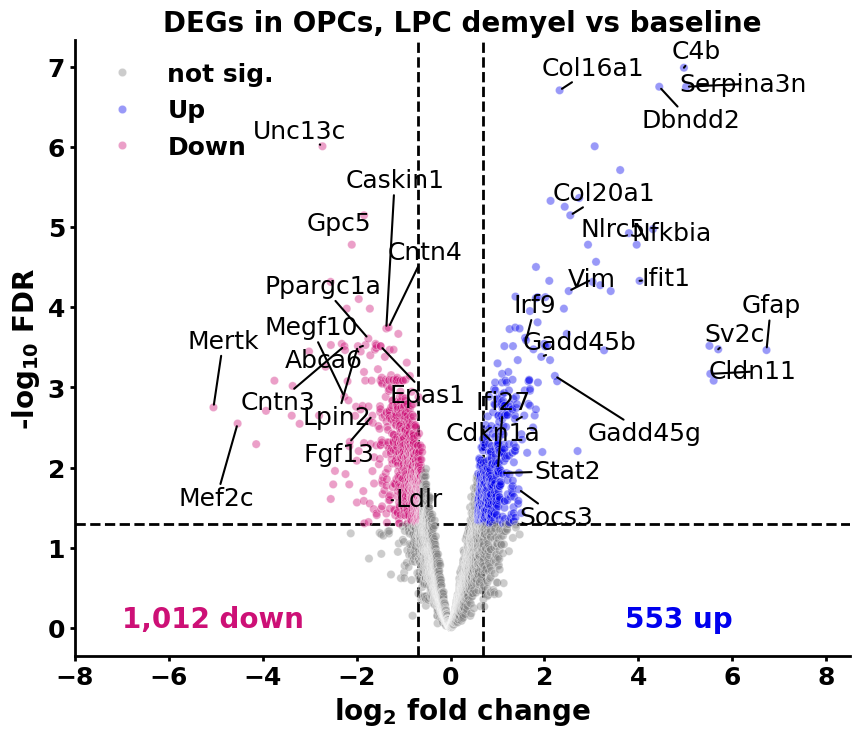

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

ax = sns.scatterplot(data=sigs, x='logFC', y='nlog10',
                     hue='color',
                     hue_order=['not sig.', 'Up', 'Down'],
                     palette=['#808080', '#0000EE', '#CD1076'],
                     markers='o',
                     alpha=0.4)  # Adjust the alpha value as needed

ax.axhline(1.3, zorder=0, c='k', lw=2, ls='--')
ax.axvline(0.7, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-0.7, zorder=0, c='k', lw=2, ls='--')

texts = []
for i in range(len(sigs)):
    if sigs.iloc[i].symbol in genes_to_show:
        x_pos = sigs.iloc[i].logFC
        y_pos = sigs.iloc[i].nlog10
        label = sigs.iloc[i].symbol
        if x_pos > 1:  # For upregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='left'))
        elif x_pos < -1:  # For downregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='right'))

#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.5))  # Adjust arrowprops for longer lines
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='black', lw=1.5),
            expand=(1, 1.2),  # Increase expansion for more separation
            force_text=(0.5, 1.2),  # Increase repulsion force
            only_move={'points': 'xy', 'text': 'xy'})  # Allow movement in both x and y directions


# Add the labels for the number of genes
ax.text(-7, 0, '1,012 down', fontsize=20, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
ax.text(6, 0, '553 up', fontsize=20, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed

# Extend x-axis limits
plt.xlim(-8, 8.5)

# Move legend to the center right within the plot
#plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'weight': 'bold'})
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, prop={'weight': 'bold', 'size': 18})

plt.title('DEGs in OPCs, LPC demyel vs baseline', size=20, weight='bold')

# Adjust spines and ticks
for spine in ['bottom', 'left', 'top', 'right']:
    ax.spines[spine].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2)
plt.xticks(size=18, weight='bold')
plt.yticks(size=18, weight='bold')

plt.xlabel(r"$\mathbf{log_{2}}$ fold change", size=20, weight='bold')
plt.ylabel(r"-$\mathbf{log_{10}}$ FDR", size=20, weight='bold')

plt.savefig('./figures/volcanopy_OPC_LPC_demyel_NEW.png', dpi=600, bbox_inches='tight', facecolor='none')

plt.show()

## LPC_demyel_MOL

In [ ]:
#### Need to reset sigs so that it contains all the genes
sigs= LPC_demyel_F
sigs['symbol'] = sigs['gene']
sigs['nlog10'] = -np.log10(sigs.Padj)
sigs = sigs.sort_values(by='logFC')
sigs

In [ ]:
sigs = sigs.sort_values(by='Padj')
sigs[60:100]

In [ ]:
sigs_both = sigs[(sigs.Padj < 0.05) & (abs(sigs.logFC) >= 0.7)]
print(sigs_both.shape)

sigs_up = sigs[(sigs.Padj < 0.05) & (sigs.logFC >= 0.7)]
print(sigs_up.shape)

sigs_down = sigs[(sigs.Padj < 0.05) & (sigs.logFC <= -0.7)]
print(sigs_down.shape)

In [ ]:
# Extracting gene sets from dataframes
genes_sig_up = set(sigs_up['symbol'])
print(genes_sig_up)

genes_sig_down = set(sigs_down['symbol'])
print(genes_sig_down)

In [ ]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = sigs_up.symbol.tolist()
picked2 = sigs_down.symbol.tolist()

def map_color(a):
    logFC, symbol, nlog10 = a
    
    if abs(logFC) < 0.7 or nlog10 < 1.3:
        return 'not sig.'
    if symbol in picked1:
        return 'Up'
    if symbol in picked2:
        return 'Down'
    
    return 'i_care'

sigs['color'] = sigs[['logFC', 'symbol', 'nlog10']].apply(map_color, axis = 1)

In [ ]:
genes_to_show = ['S100a10','Serpina3n', 'C4b', 'Socs3', 'B2m', 'Spock3', 'Trim7', 'Cbx7',
                'Ifi27', 'Irf9','Gadd45b', 'Gadd45g', 'Csf1', 'Fmn1', 'Stat2', 'Vim',
                'Nlgn1', 'Dennd2a', 'Dnah8', 'Rel', 'Ptger4', 'Vmp1',
                 'Hmgb3', 'Mcm2', 'Cx3cr1', 'Itgb5', 'Fabp3', 'Klk8', 'Syt4', 'Bcan', 'Tnfrsf1a', 'Chl1'
                ]
genes_to_show

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

ax = sns.scatterplot(data=sigs, x='logFC', y='nlog10',
                     hue='color',
                     hue_order=['not sig.', 'Up', 'Down'],
                     palette=['#808080', '#0000EE', '#CD1076'],
                     markers='o',
                     alpha=0.4)  # Adjust the alpha value as needed

ax.axhline(1.3, zorder=0, c='k', lw=2, ls='--')
ax.axvline(0.7, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-0.7, zorder=0, c='k', lw=2, ls='--')

texts = []
for i in range(len(sigs)):
    if sigs.iloc[i].symbol in genes_to_show:
        x_pos = sigs.iloc[i].logFC
        y_pos = sigs.iloc[i].nlog10
        label = sigs.iloc[i].symbol
        if x_pos > 1:  # For upregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='left'))
        elif x_pos < -1:  # For downregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.5))  # Adjust arrowprops for longer lines

# Add the labels for the number of genes
#ax.text(-4.5, 0, '352 down', fontsize=20, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
#ax.text(4, 0, '239 up', fontsize=20, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed
ax.text(-6, 0, '406 down', fontsize=20, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
ax.text(6, 0, '338 up', fontsize=20, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed

# Extend x-axis limits
plt.xlim(-7.5, 12.5)

# Move legend to the center right within the plot
#plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'weight': 'bold'})
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, prop={'weight': 'bold', 'size': 18})

#plt.title('DEGs in OPCs, LPC demyel vs baseline', size=20, weight='bold')
plt.title('DEGs in MOL_F vs _D: LPC demyel vs baseline', size=20, weight='bold')

# Adjust spines and ticks
for spine in ['bottom', 'left', 'top', 'right']:
    ax.spines[spine].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2)
plt.xticks(size=18, weight='bold')
plt.yticks(size=18, weight='bold')

plt.xlabel(r"$\mathbf{log_{2}}$ fold change", size=20, weight='bold')
plt.ylabel(r"-$\mathbf{log_{10}}$ FDR", size=20, weight='bold')

plt.savefig('./figures/volcanopy_MOL_F_LPC_demyel.png', dpi=600, bbox_inches='tight', facecolor='none')

plt.show()

# LPC_demyel_E

In [ ]:
#### Need to reset sigs so that it contains all the genes
sigs= LPC_demyel_E
sigs['symbol'] = sigs['gene']
sigs['nlog10'] = -np.log10(sigs.Padj)
sigs = sigs.sort_values(by='logFC')
sigs

In [ ]:
sigs = sigs.sort_values(by='Padj')
sigs[:40]

In [ ]:
sigs_both = sigs[(sigs.Padj < 0.05) & (abs(sigs.logFC) >= 0.7)]
print(sigs_both.shape)

sigs_up = sigs[(sigs.Padj < 0.05) & (sigs.logFC >= 0.7)]
print(sigs_up.shape)

sigs_down = sigs[(sigs.Padj < 0.05) & (sigs.logFC <= -0.7)]
print(sigs_down.shape)

In [ ]:
# Extracting gene sets from dataframes
genes_sig_up = set(sigs_up['symbol'])
print(genes_sig_up)

genes_sig_down = set(sigs_down['symbol'])
print(genes_sig_down)

In [ ]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = sigs_up.symbol.tolist()
picked2 = sigs_down.symbol.tolist()

def map_color(a):
    logFC, symbol, nlog10 = a
    
    if abs(logFC) < 0.7 or nlog10 < 1.3:
        return 'not sig.'
    if symbol in picked1:
        return 'Up'
    if symbol in picked2:
        return 'Down'
    
    return 'i_care'

sigs['color'] = sigs[['logFC', 'symbol', 'nlog10']].apply(map_color, axis = 1)

In [ ]:
genes_to_show = ['S100a10','Serpina3n', 'C4b', 'Socs3', 'B2m', 'Spock3', 'Cbx7',
                'Ifi27', 'Irf9','Gadd45b', 'Gadd45g', 'Csf1', 'Fmn1', 'Stat2', 'Vim',
                'Nlgn1', 'Dennd2a', 'Dnah8', 'Rel', 'Ptger4', 'Vmp1',
                 'Hmgb3', 'Mcm2', 'Cx3cr1', 'Itgb5', 'Fabp3', 'Klk8', 'Syt4', 'Bcan', 'Tnfrsf1a', 'Chl1'
                ]
genes_to_show

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

ax = sns.scatterplot(data=sigs, x='logFC', y='nlog10',
                     hue='color',
                     hue_order=['not sig.', 'Up', 'Down'],
                     palette=['#808080', '#0000EE', '#CD1076'],
                     markers='o',
                     alpha=0.4)  # Adjust the alpha value as needed

ax.axhline(1.3, zorder=0, c='k', lw=2, ls='--')
ax.axvline(0.7, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-0.7, zorder=0, c='k', lw=2, ls='--')

texts = []
for i in range(len(sigs)):
    if sigs.iloc[i].symbol in genes_to_show:
        x_pos = sigs.iloc[i].logFC
        y_pos = sigs.iloc[i].nlog10
        label = sigs.iloc[i].symbol
        if x_pos > 1:  # For upregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='left'))
        elif x_pos < -1:  # For downregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.5))  # Adjust arrowprops for longer lines

# Add the labels for the number of genes
#ax.text(-4.5, 0, '352 down', fontsize=20, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
#ax.text(4, 0, '239 up', fontsize=20, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed
ax.text(-6, 0, '433 down', fontsize=20, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
ax.text(6, 0, '478 up', fontsize=20, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed

# Extend x-axis limits
plt.xlim(-6.5, 12.5)

# Move legend to the center right within the plot
#plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'weight': 'bold'})
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, prop={'weight': 'bold', 'size': 18})

#plt.title('DEGs in OPCs, LPC demyel vs baseline', size=20, weight='bold')
plt.title('DEGs in MOL_E vs _D: LPC demyel vs baseline', size=20, weight='bold')

# Adjust spines and ticks
for spine in ['bottom', 'left', 'top', 'right']:
    ax.spines[spine].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2)
plt.xticks(size=18, weight='bold')
plt.yticks(size=18, weight='bold')

plt.xlabel(r"$\mathbf{log_{2}}$ fold change", size=20, weight='bold')
plt.ylabel(r"-$\mathbf{log_{10}}$ FDR", size=20, weight='bold')

plt.savefig('./figures/volcanopy_MOL_E_LPC_demyel.png', dpi=600, bbox_inches='tight', facecolor='none')

plt.show()

## LPC_remyel_MOL

In [ ]:
#### Need to reset sigs so that it contains all the genes
sigs= LPC_remyel_E
sigs['symbol'] = sigs['gene']
sigs['nlog10'] = -np.log10(sigs.Padj)
sigs = sigs.sort_values(by='logFC')
sigs

In [ ]:
sigs_both = sigs[(sigs.Padj < 0.05) & (abs(sigs.logFC) >= 1)]
print(sigs_both.shape)

sigs_up = sigs[(sigs.Padj < 0.05) & (sigs.logFC >= 0.7)]
print(sigs_up.shape)

sigs_down = sigs[(sigs.Padj < 0.05) & (sigs.logFC <= -0.7)]
print(sigs_down.shape)

In [ ]:
# Extracting gene sets from dataframes
genes_sig_up = set(sigs_up['symbol'])
print(genes_sig_up)

genes_sig_down = set(sigs_down['symbol'])
print(genes_sig_down)

In [ ]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = sigs_up.symbol.tolist()
picked2 = sigs_down.symbol.tolist()

def map_color(a):
    logFC, symbol, nlog10 = a
    
    if abs(logFC) < 0.7 or nlog10 < 1.3:
        return 'not sig.'
    if symbol in picked1:
        return 'Up'
    if symbol in picked2:
        return 'Down'
    
    return 'i_care'

sigs['color'] = sigs[['logFC', 'symbol', 'nlog10']].apply(map_color, axis = 1)

In [ ]:
genes_to_show = ['Anxa2','Serpina3n', 'C4b', 'Socs3', 'B2m', 'H2-D1', 'Irf1',
                'Ifi27', 'Irf9','Gadd45b', 'Gadd45g', 'Stat2', 'Vim', 'Tnfrsf1a',
                 'Alcam', 'Trim7', 'Lama2', 'Thsd4', 'Cebpd', 'Tnfrsf12a', 'Cd44', 'Anln'
                ]
genes_to_show

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

ax = sns.scatterplot(data=sigs, x='logFC', y='nlog10',
                     hue='color',
                     hue_order=['not sig.', 'Up', 'Down'],
                     palette=['#808080', '#0000EE', '#CD1076'],
                     markers='o',
                     alpha=0.4)  # Adjust the alpha value as needed

ax.axhline(1.3, zorder=0, c='k', lw=2, ls='--')
ax.axvline(0.7, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-0.7, zorder=0, c='k', lw=2, ls='--')

texts = []
for i in range(len(sigs)):
    if sigs.iloc[i].symbol in genes_to_show:
        x_pos = sigs.iloc[i].logFC
        y_pos = sigs.iloc[i].nlog10
        label = sigs.iloc[i].symbol
        if x_pos > 1:  # For upregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='left'))
        elif x_pos < -1:  # For downregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.5))  # Adjust arrowprops for longer lines

# Add the labels for the number of genes
#ax.text(-4.5, 0, '352 down', fontsize=20, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
#ax.text(4, 0, '239 up', fontsize=20, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed
# Add the labels for the number of genes
# Add the labels for the number of genes
ax.text(-3.5, 0, '414 down', fontsize=14, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
ax.text(3, 0, '474 up', fontsize=14, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed

# Extend x-axis limits
plt.xlim(-4, 7.5)

# Move legend to the center right within the plot
#plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'weight': 'bold'})
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, prop={'weight': 'bold', 'size': 18})

plt.title('DEGs in MOL E: LPC remyel vs baseline', size=20, weight='bold')

# Adjust spines and ticks
for spine in ['bottom', 'left', 'top', 'right']:
    ax.spines[spine].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2)
plt.xticks(size=18, weight='bold')
plt.yticks(size=18, weight='bold')

plt.xlabel(r"$\mathbf{log_{2}}$ fold change", size=20, weight='bold')
plt.ylabel(r"-$\mathbf{log_{10}}$ FDR", size=20, weight='bold')

plt.savefig('./figures/volcanopy_MOL_E_LPC_remyel.png', dpi=600, bbox_inches='tight', facecolor='none')

plt.show()

## Cupr_demyel_MOL

In [ ]:
#### Need to reset sigs so that it contains all the genes
sigs= Cupr_demyel_G
sigs['symbol'] = sigs['gene']
sigs['nlog10'] = -np.log10(sigs.Padj)
sigs = sigs.sort_values(by='logFC')
sigs

In [ ]:
sigs_both = sigs[(sigs.Padj < 0.05) & (abs(sigs.logFC) >= 1)]
print(sigs_both.shape)

sigs_up = sigs[(sigs.Padj < 0.05) & (sigs.logFC >= 0.7)]
print(sigs_up.shape)

sigs_down = sigs[(sigs.Padj < 0.05) & (sigs.logFC <= -0.7)]
print(sigs_down.shape)

In [ ]:
sigs_down[:20]

In [ ]:
# Extracting gene sets from dataframes
genes_sig_up = set(sigs_up['symbol'])
print(genes_sig_up)

genes_sig_down = set(sigs_down['symbol'])
print(genes_sig_down)

In [ ]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = sigs_up.symbol.tolist()
picked2 = sigs_down.symbol.tolist()

def map_color(a):
    logFC, symbol, nlog10 = a
    
    if abs(logFC) < 0.7 or nlog10 < 1.3:
        return 'not sig.'
    if symbol in picked1:
        return 'Up'
    if symbol in picked2:
        return 'Down'
    
    return 'i_care'

sigs['color'] = sigs[['logFC', 'symbol', 'nlog10']].apply(map_color, axis = 1)

In [ ]:
genes_to_show = ['Anxa2','Serpina3n', 'C4b', 'Socs3', 'B2m', 'Irf1', 'Syt4', 'Moxd1', 'Sgk2', 'Ptgds', 'Cacna2d4',
                 'Lgals3', 'Vim', 'Lgmn', 'Scd2', 'Abca2', 'Ldlr', 'Nupr1', 'Cdkn1a', 'Opalin', 'Rasgrp3', 'Ddit3',
                'Ifi27', 'Irf9','Gadd45a', 'Stat2', 'Lama2', 'Tnfrsf12a', 'Anln', 'Ldlrad4', 'Fos'
                ]
genes_to_show

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

ax = sns.scatterplot(data=sigs, x='logFC', y='nlog10',
                     hue='color',
                     hue_order=['not sig.', 'Up', 'Down'],
                     palette=['#808080', '#0000EE', '#CD1076'],
                     markers='o',
                     alpha=0.4)  # Adjust the alpha value as needed

ax.axhline(1.3, zorder=0, c='k', lw=2, ls='--')
ax.axvline(0.7, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-0.7, zorder=0, c='k', lw=2, ls='--')

texts = []
for i in range(len(sigs)):
    if sigs.iloc[i].symbol in genes_to_show:
        x_pos = sigs.iloc[i].logFC
        y_pos = sigs.iloc[i].nlog10
        label = sigs.iloc[i].symbol
        if x_pos > 1:  # For upregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='left'))
        elif x_pos < -1:  # For downregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=18, weight='regular', ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.5))  # Adjust arrowprops for longer lines

# Add the labels for the number of genes
ax.text(-6.5, 0, '781 down', fontsize=20, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
ax.text(6, 0, '595 up', fontsize=20, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed

# Extend x-axis limits
plt.xlim(-9.5, 10.5)

# Move legend to the center right within the plot
#plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'weight': 'bold'})
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=False, prop={'weight': 'bold', 'size': 12})

plt.title('DEGs in MOL_G: Cupr demyel vs baseline', size=20, weight='bold')


# Adjust spines and ticks
for spine in ['bottom', 'left', 'top', 'right']:
    ax.spines[spine].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2)
plt.xticks(size=18, weight='bold')
plt.yticks(size=18, weight='bold')

plt.xlabel(r"$\mathbf{log_{2}}$ fold change", size=20, weight='bold')
plt.ylabel(r"-$\mathbf{log_{10}}$ FDR", size=20, weight='bold')

plt.savefig('./figures/volcanopy_MOL_G_Cupr_demyel.png', dpi=600, bbox_inches='tight', facecolor='none')

plt.show()

## Cupr_remyel_MOL

In [ ]:
Cupr_remyel_E = pd.read_csv('./files/Cupr_remyel_MOL_BvE_voom_FINAL.csv', index_col=None)
Cupr_remyel_E.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_remyel_E.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_remyel_E.shape

In [ ]:
#### Need to reset sigs so that it contains all the genes
sigs= Cupr_remyel_E
sigs['symbol'] = sigs['gene']
sigs['nlog10'] = -np.log10(sigs.Padj)
sigs = sigs.sort_values(by='logFC')
sigs

In [ ]:
sigs_both = sigs[(sigs.Padj < 0.05) & (abs(sigs.logFC) >= 1)]
print(sigs_both.shape)

sigs_up = sigs[(sigs.Padj < 0.05) & (sigs.logFC >= 1)]
print(sigs_up.shape)

sigs_down = sigs[(sigs.Padj < 0.05) & (sigs.logFC <= -1)]
print(sigs_down.shape)

In [ ]:
# Extracting gene sets from dataframes
genes_sig_up = set(sigs_up['symbol'])
print(genes_sig_up)

genes_sig_down = set(sigs_down['symbol'])
print(genes_sig_down)

In [ ]:
sigs_up

In [ ]:
#picked1 and picked2 simulate user lists of genes to label by color
picked1 = sigs_up.symbol.tolist()
picked2 = sigs_down.symbol.tolist()

def map_color(a):
    logFC, symbol, nlog10 = a
    
    if abs(logFC) < 1 or nlog10 < 1.3:
        return 'not sig.'
    if symbol in picked1:
        return 'Up'
    if symbol in picked2:
        return 'Down'
    
    return 'i_care'

sigs['color'] = sigs[['logFC', 'symbol', 'nlog10']].apply(map_color, axis = 1)

In [ ]:
genes_to_show = ['Cntn3', 'Nrtn', 'Plekha1', 'Man1a', 'Ldlrap1', 'Astn2', 
                 'Tma16', 'Bmp1', 'Rnf122', 'Klhl32', 'Slc9a3r2',
                 'C4b', 'Crtac1',
                 'Spock3', 'Cadm1', 'Ankub1', 'Rasgrp3', 'Gstm1'
                ]
genes_to_show

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

ax = sns.scatterplot(data=sigs, x='logFC', y='nlog10',
                     hue='color',
                     hue_order=['not sig.', 'Up', 'Down'],
                     palette=['#808080', '#0000EE', '#CD1076'],
                     markers='o',
                     alpha=0.4)  # Adjust the alpha value as needed

ax.axhline(1.3, zorder=0, c='k', lw=2, ls='--')
ax.axvline(1, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-1, zorder=0, c='k', lw=2, ls='--')

texts = []
for i in range(len(sigs)):
    if sigs.iloc[i].symbol in genes_to_show:
        x_pos = sigs.iloc[i].logFC
        y_pos = sigs.iloc[i].nlog10
        label = sigs.iloc[i].symbol
        if x_pos > 1:  # For upregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=14, weight='bold', ha='left'))
        elif x_pos < -1:  # For downregulated genes
            texts.append(plt.text(x=x_pos, y=y_pos, s=label, fontsize=14, weight='bold', ha='right'))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=1.5))  # Adjust arrowprops for longer lines

# Add the labels for the number of genes
ax.text(-3, 0, '7 down', fontsize=14, color='#CD1076', weight='bold', ha='left')  # Adjust the position as needed
ax.text(3, 0, '24 up', fontsize=14, color='#0000EE', weight='bold', ha='right')  # Adjust the position as needed

# Extend x-axis limits
plt.xlim(-4.5, 6.5)

# Move legend to the center right within the plot
#plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'weight': 'bold'})
#plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, prop={'weight': 'bold', 'size': 12})
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False, prop={'weight': 'bold', 'size': 12})

plt.title('DEGs in MOL_E: Cupr remyel vs baseline', size=16, weight='bold')

# Adjust spines and ticks
for spine in ['bottom', 'left', 'top', 'right']:
    ax.spines[spine].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2)
plt.xticks(size=16, weight='bold')
plt.yticks(size=16, weight='bold')

plt.xlabel(r"$\mathbf{log_{2}}$ fold change", size=18, weight='bold')
plt.ylabel(r"-$\mathbf{log_{10}}$ FDR", size=18, weight='bold')

plt.savefig('./figures/volcanopy_MOL_E_Cupr_remyel.png', dpi=600, bbox_inches='tight', facecolor='none')

plt.show()